In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
#Libaries for Data Manipulation
import pandas as pd
import numpy as np

#Libaries of Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#For hypertuning 
import optuna

#Machine Learning Algorithms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import(
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    ExtraTreesClassifier)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib

#Library for Cross-Validation
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict,RandomizedSearchCV

#Model Evaluation Metrics
from sklearn.metrics import(
accuracy_score,
recall_score,
precision_score,
f1_score,
confusion_matrix,classification_report,
roc_auc_score,
roc_curve,
)

# Load and Inspect Dataset

In [3]:
train_df=pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_df=pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")
submission_df=pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")

In [4]:
train_df.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [5]:
test_df.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

In [6]:
set(train_df.columns)-set(test_df.columns)

{'Target'}

In [7]:
train_df["Target"]

0        Graduate
1         Dropout
2         Dropout
3        Enrolled
4        Graduate
           ...   
76513    Graduate
76514    Graduate
76515    Enrolled
76516     Dropout
76517    Graduate
Name: Target, Length: 76518, dtype: object

In [8]:
submission_df.head()

id    Target
0  76518  Graduate
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Graduate

In [9]:
train_df.shape

(76518, 38)

In [10]:
test_df.shape

(51012, 37)

# Data Exploration

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [12]:
train_df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [13]:
test_df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [14]:
#Identify the data types of columns
numerical_count=0
categorical_count=0

for label,content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        numerical_count +=1
    else:
        categorical_count +=1
#Print the counts
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 37 Numerical Columns in dataset
There are 1 Categorical Columns in dataset


In [15]:
#Checking if there's Any Duplicate Records.
print("Duplicates in Dataset: ",train_df.duplicated().sum())

Duplicates in Dataset:  0


In [16]:
### Checking Unique Values of Categorical Attributes.

#  Checking Unique Values of Categorical Attributes.

In [17]:
#Checking Unique enteries in Train_df
cat_cols=train_df.select_dtypes(include="object").columns

for column in cat_cols:
    print("Unique values of ",column,set(train_df[column]))

Unique values of  Target {'Enrolled', 'Dropout', 'Graduate'}


# Exploratory Data Analysis(EDA)

#  1.Checking for outliers

In [18]:
train_df.drop("id",inplace=True,axis=1)
test_df.drop("id",inplace=True,axis=1)





In [19]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)



36

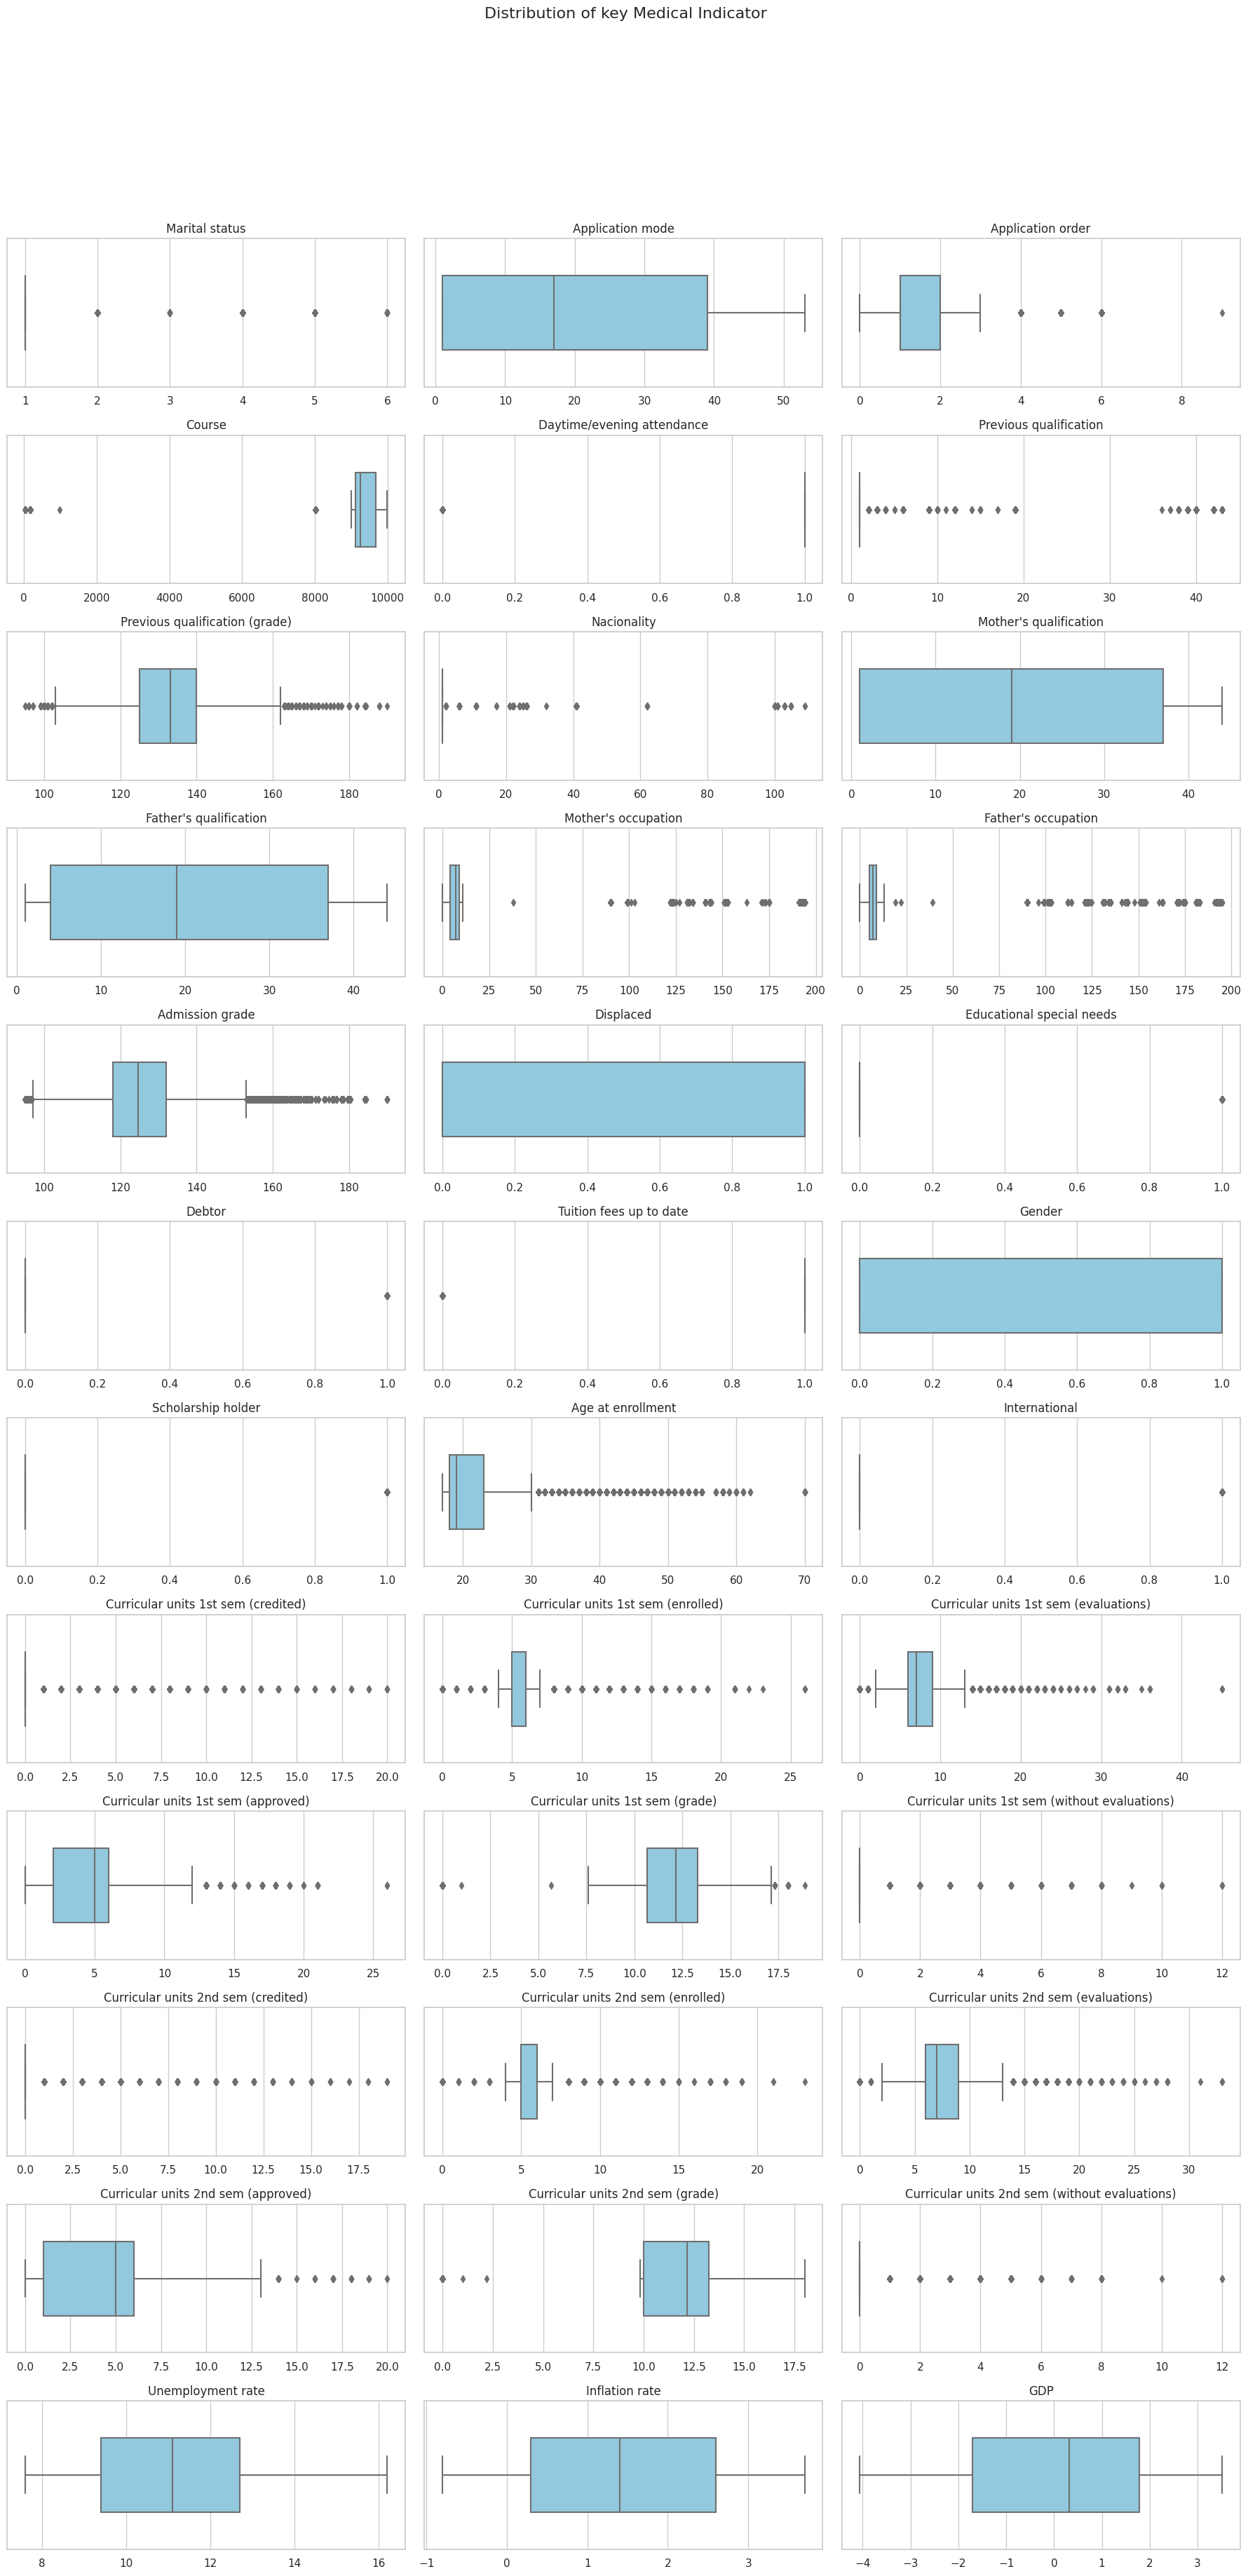

In [20]:
import math
#Number of numerical cols
num_columns=len(test_df.columns)

#Calculate the number of rows and columns needed for the  subplots
num_cols=3
num_rows=math.ceil(num_columns/num_cols)#Calculate rows needed

plt.figure(figsize=(18,num_rows*3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i,col in enumerate(numerical_columns,1):
    plt.subplot(num_rows,num_cols,i)
    sns.boxplot(x=train_df[col],color="skyblue",width=0.5)
    plt.title(col)
    plt.xlabel("")
    
plt.suptitle("Distribution of key Medical Indicator",y=1.02,fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 2.Visualizing Class Distribution

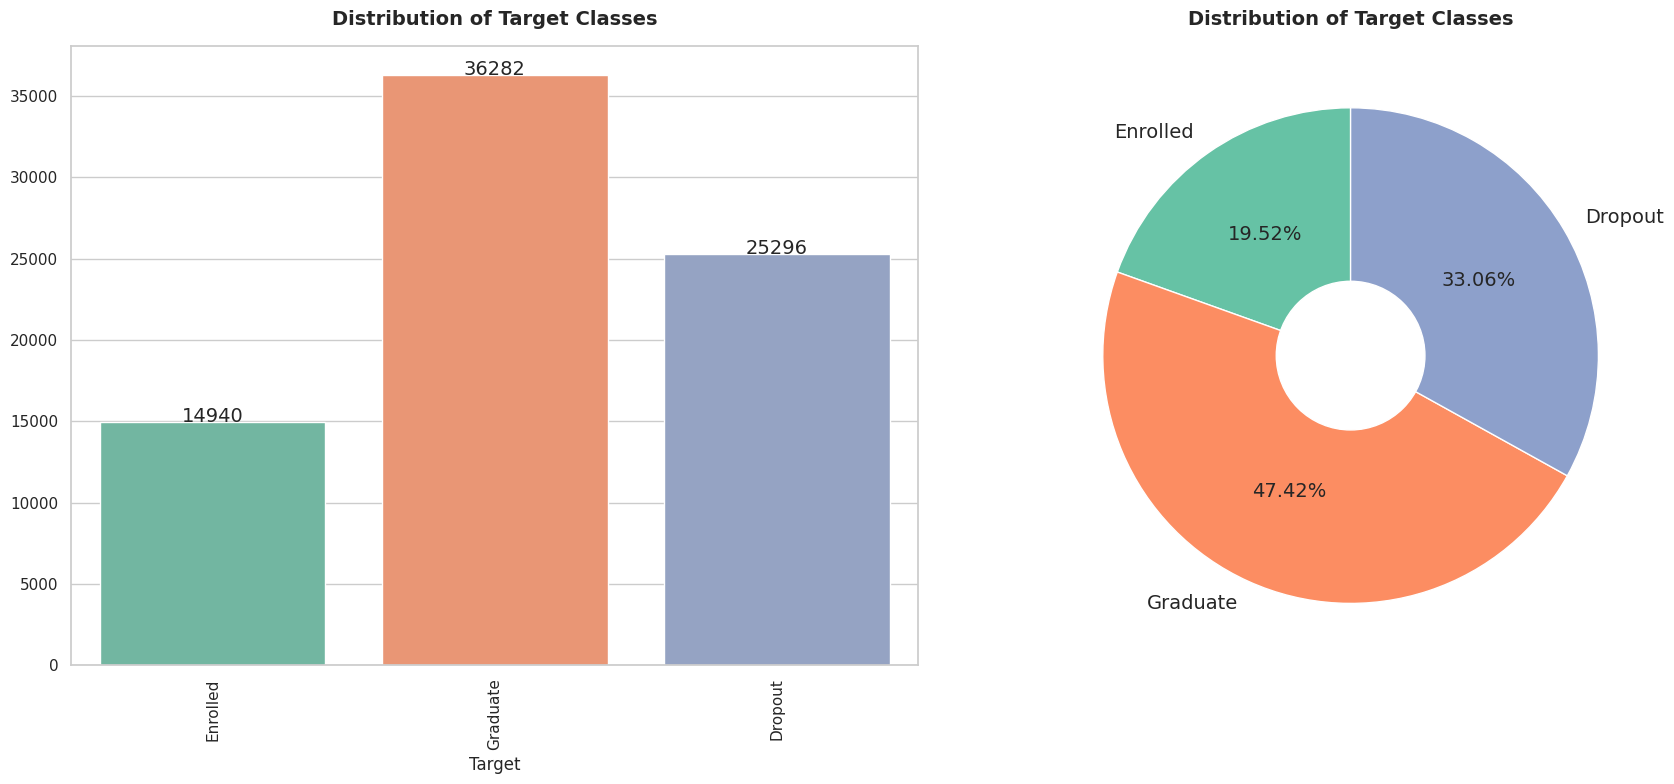

In [21]:
#Unique values of Target for multiclass
classes=["Enrolled","Graduate","Dropout"]

#Visualization  to show distribution of Target classes in counts
plt.figure(figsize=(18,8))

#Subplot 1: Bar plot of target class counts
plt.subplot(1,2,1)
Target_counts=train_df["Target"].value_counts().reindex(classes)
sns.barplot(x=Target_counts.index,y=Target_counts.values,palette="Set2")
plt.title("Distribution of Target Classes",fontweight="black",size=14,pad=15)
for i,v in enumerate(Target_counts.values):
    
    plt.text(i,v,v,ha="center",fontsize=14)
plt.xticks(rotation=90)

#Subplot 2: Pie chart of target class distribution
plt.subplot(1,2,2)
colors=sns.color_palette("Set2",len(classes))
plt.pie(Target_counts,labels=classes,autopct="%.2f%%",textprops={"size":14},
       colors=colors,startangle=90)
center_circle=plt.Circle((0,0),0.3,fc="white")
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Distribution of Target Classes",fontweight="black",size=14,pad=15)
plt.tight_layout()
plt.show()
            

# 4| Preprocessing

# 1.Feature Engineering

In [22]:
numerical_columns=test_df.columns

#train_df[numerical_columns].quantile()
#train_df["Course"].value_counts()


In [23]:
def generate_features(df):
    #Create new features
    df["units failed 1"]=df["Curricular units 1st sem (enrolled)"]- df["Curricular units 1st sem (approved)"]
    df["mean"]=df[numerical_columns].mean(axis=1).round(2)
    quartiles=df[numerical_columns].quantile([0.25,0.5,0.75],axis=1)
    df["second_quartile"]=quartiles.loc[0.5]
    df["third_quartile"]=quartiles.loc[0.75]
    
    #Original_cols=list(X.columns)
    df["Inflation_GDP_ratio"]=df["Inflation rate"] / df["GDP"]
    df["Unemployment_GDP_ratio"]=df["Unemployment rate"] / df["GDP"]
    df["GDP_inflation_interaction"]=df["GDP"] * df["Inflation rate"]
    return df
    

                 

In [24]:
generate_features(train_df)

Marital status  Application mode  Application order  Course  \
0                   1                 1                  1    9238   
1                   1                17                  1    9238   
2                   1                17                  2    9254   
3                   1                 1                  3    9500   
4                   1                 1                  2    9500   
...               ...               ...                ...     ...   
76513               1                17                  1    9254   
76514               1                 1                  6    9254   
76515               5                17                  1    9085   
76516               1                 1                  3    9070   
76517               1                 1                  1    9773   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                       1   
4                               1                       1   
...                           ...                     ...   
76513                           1                       1   
76514                           1                       1   
76515                           1                       1   
76516                           1                       1   
76517                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               126.0            1                       1   
1                               125.0            1                      19   
2                               137.0            1                       3   
3                               131.0            1                      19   
4                               132.0            1                      19   
...                               ...          ...                     ...   
76513                           121.0            1                      19   
76514                           125.0            1                       1   
76515                           138.0            1                      37   
76516                           136.0            1                      38   
76517                           133.1            1                      19   

       Father's qualification  ...  Inflation rate   GDP    Target  \
0                          19  ...             0.6  2.02  Graduate   
1                          19  ...             0.6  2.02   Dropout   
2                          19  ...             0.3 -0.92   Dropout   
3                           3  ...             0.6  2.02  Enrolled   
4                          37  ...             2.6  0.32  Graduate   
...                       ...  ...             ...   ...       ...   
76513                       1  ...            -0.3  0.79  Graduate   
76514                      38  ...            -0.8 -3.12  Graduate   
76515                      37  ...            -0.8 -3.12  Enrolled   
76516                      37  ...             2.6  0.32   Dropout   
76517                      19  ...             2.8 -4.06  Graduate   

       units failed 1    mean  second_quartile  third_quartile  \
0                   0  267.23             1.00        6.250000   
1                   2  267.75             1.00        9.525000   
2                   6  267.59             1.00        3.750000   
3                   0  275.03             2.01        9.500000   
4                   1  275.96             2.30       12.000000   
...               ...     ...              ...             ...   
76513               0  267.84             1.00        9.400000   
76514               2  268.89             1.00        9.100000   
76515               1  265.52             4.50       11.67500

In [25]:
generate_features(test_df)

Marital status  Application mode  Application order  Course  \
0                   1                 1                  1    9500   
1                   1                 1                  1    9238   
2                   1                 1                  1    9238   
3                   1                44                  1    9147   
4                   1                39                  1    9670   
...               ...               ...                ...     ...   
51007               1                 1                  2     171   
51008               2                39                  1    9119   
51009               1                 1                  1     171   
51010               1                 1                  3    9773   
51011               1                 1                  1     171   

       Daytime/evening attendance  Previous qualification  \
0                               1                       1   
1                               1                       1   
2                               1                       1   
3                               1                      39   
4                               1                       1   
...                           ...                     ...   
51007                           1                       1   
51008                           1                      19   
51009                           1                       1   
51010                           1                       1   
51011                           1                       1   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
0                               141.0            1                       3   
1                               128.0            1                       1   
2                               118.0            1                       1   
3                               130.0            1                       1   
4                               110.0            1                       1   
...                               ...          ...                     ...   
51007                           128.0            1                      38   
51008                           133.1            1                      19   
51009                           127.0            1                       1   
51010                           132.0            1                      19   
51011                           129.0            1                      37   

       Father's qualification  ...  Unemployment rate  Inflation rate   GDP  \
0                           1  ...               13.9            -0.3  0.79   
1                          19  ...               11.1             0.6  2.02   
2                          19  ...               15.5             2.8 -4.06   
3                          19  ...                8.9             1.4  3.51   
4                          37  ...                7.6             2.6  0.32   
...                       ...  ...                ...             ...   ...   
51007                      37  ...               15.5             2.8 -4.06   
51008                      37  ...                9.4            -0.8 -3.12   
51009                       1  ...               15.5             2.8 -4.06   
51010                      19  ...                7.6             2.6  0.32   
51011                      38  ...                7.6             2.6  0.32   

       units failed 1    mean  second_quartile  third_quartile  \
0                   7  273.76            0.395           2.250   
1                   0  267.13            1.000           6.250   
2                   0  266.98            1.000          11.000   
3                   1  267.76            3.000          12.125   
4                   3  279.92            2.300           9.000   
...               ...     ...              ...             ...   
51007               0   15.50            0.500           3.850   
51008              

# 2.Target feature Encoding

In [26]:
label_encoder=LabelEncoder()


In [27]:
label_encoder.fit(train_df["Target"])
label_encoder.classes_
train_df["Target"]=label_encoder.fit_transform(train_df["Target"])
#label_encoder.inverse_transform(label)

In [28]:
label_mapping=dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
label_mapping

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

# 3.Checking highly Correlated Features

<Axes: title={'center': 'Correlation Plot'}>

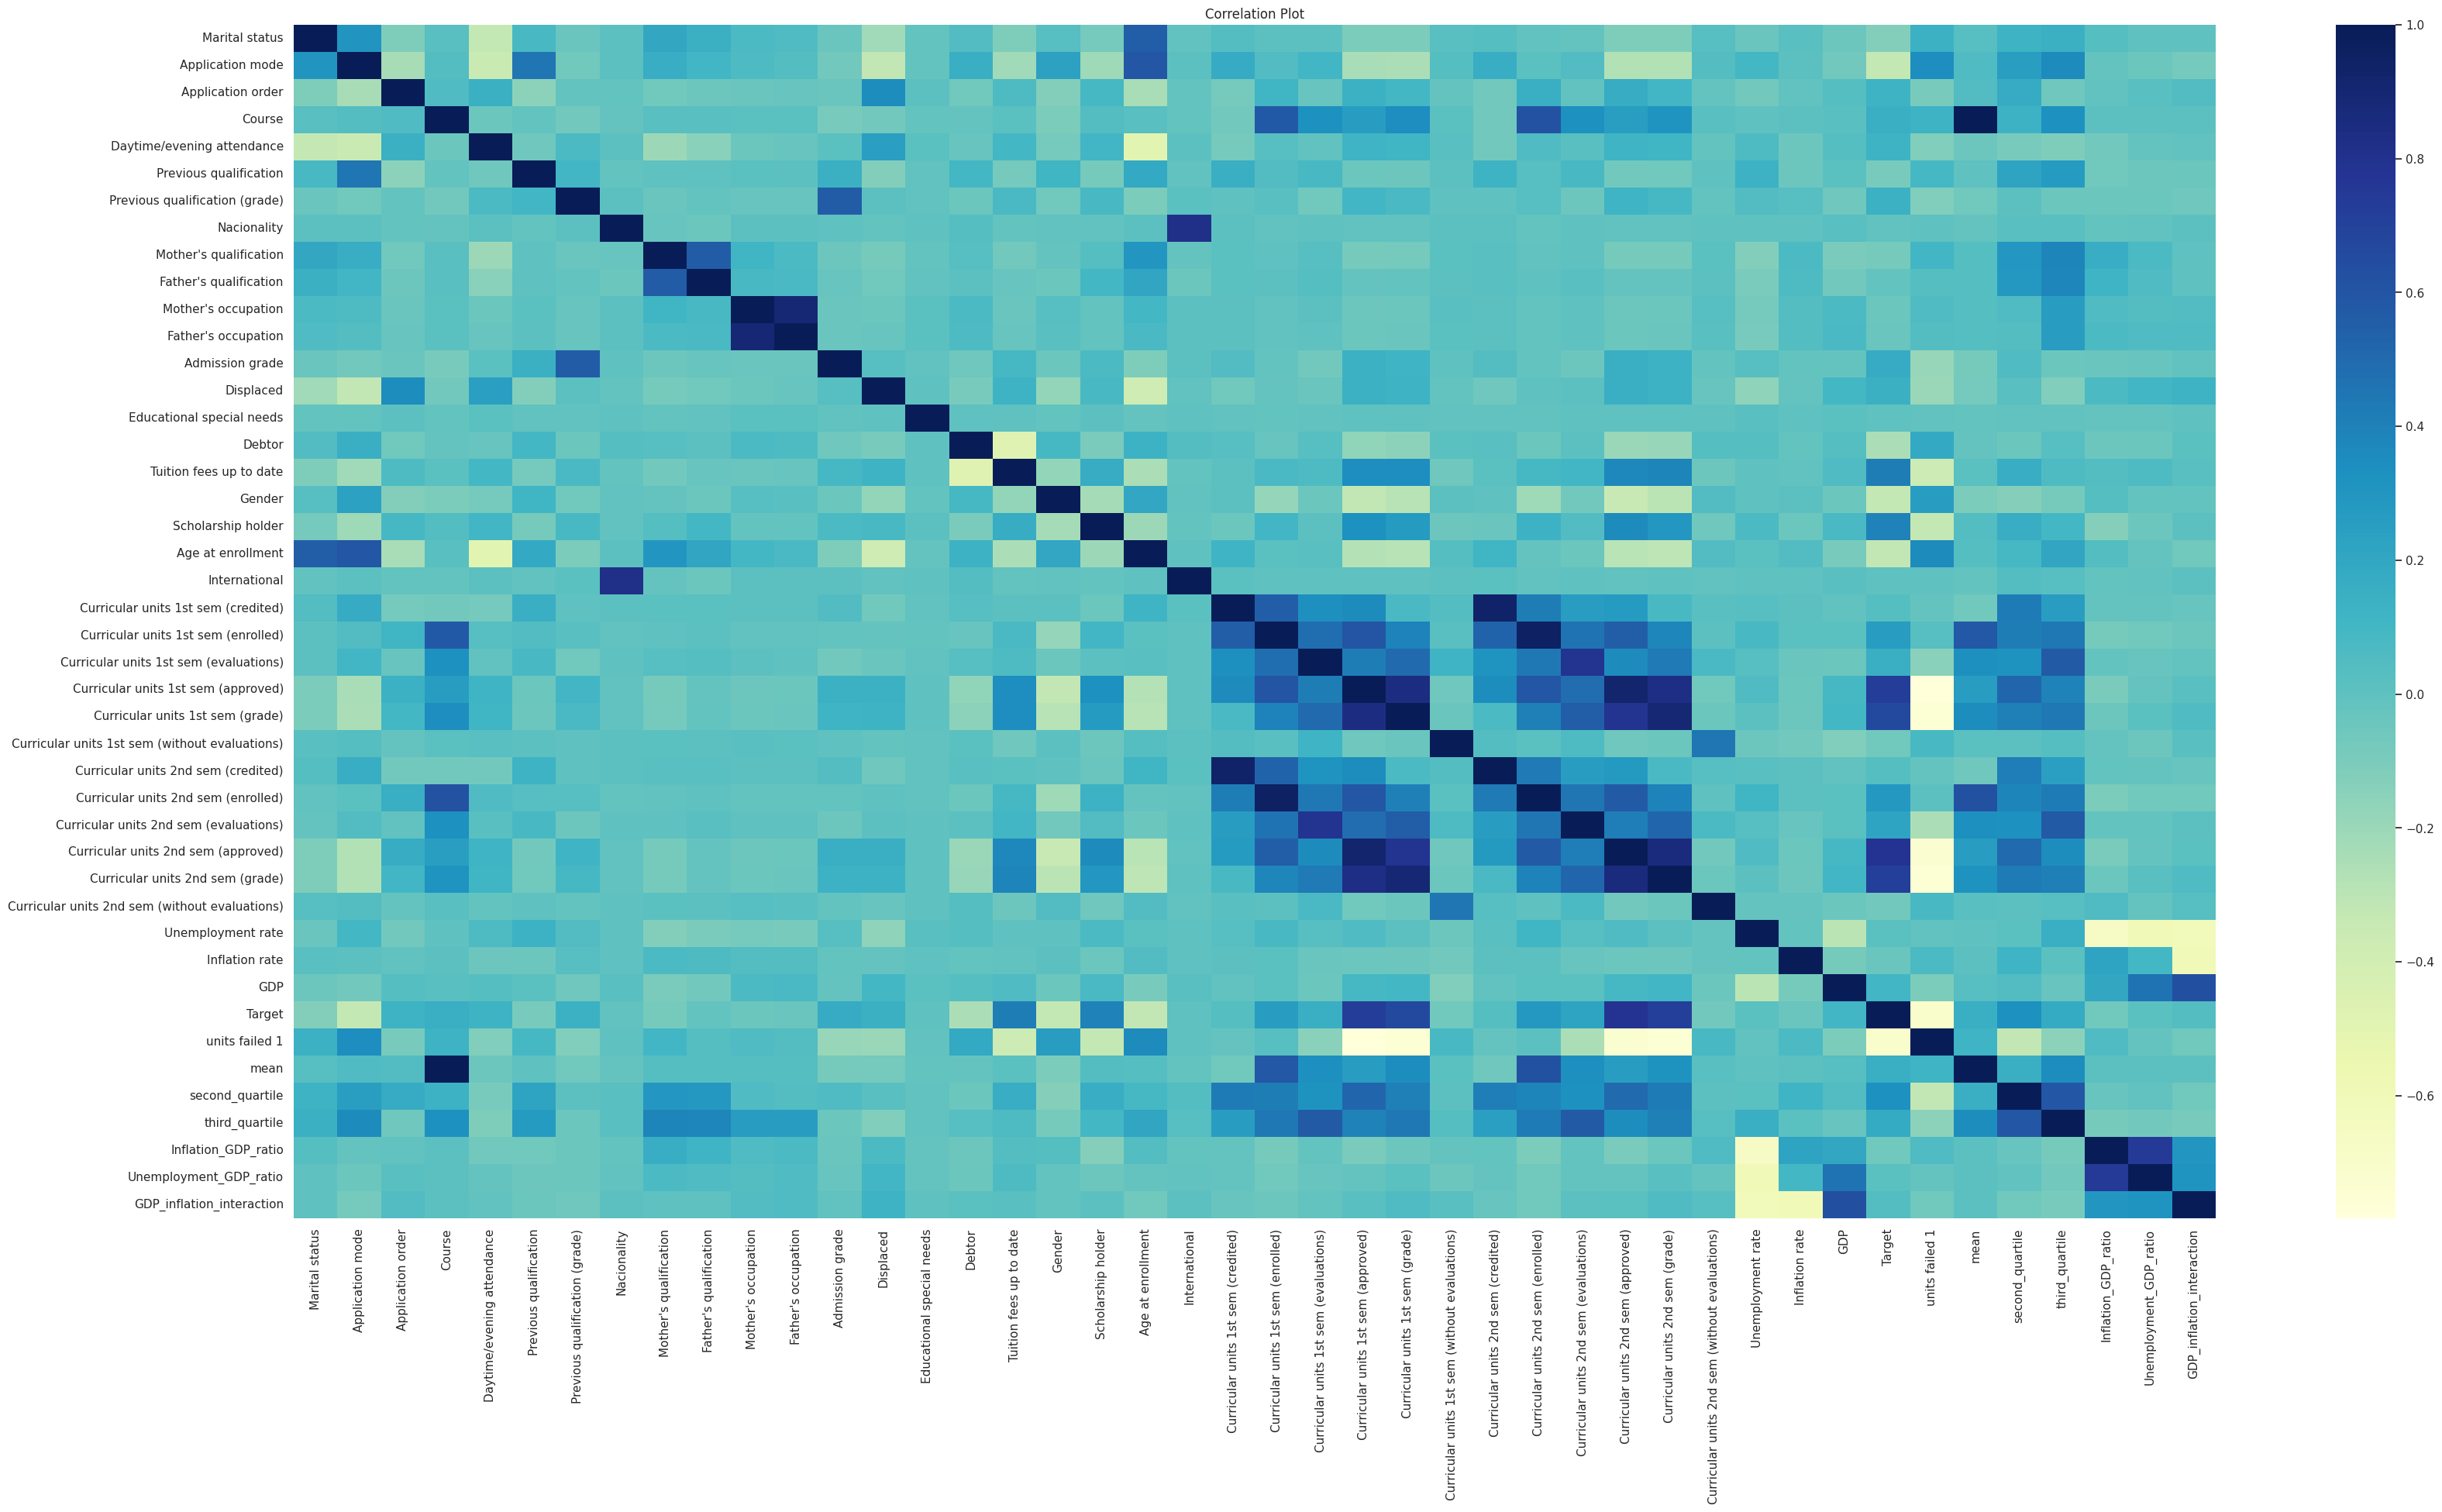

In [29]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(train_df.corr(),cmap="YlGnBu")

In [30]:
#Calculate the correlation matrix
correlation_matrix=train_df.corr()

#Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask=correlation_matrix>=0.75

#Identify and list the highly correlated features
highly_correlated_features=[]

for feature in high_correlation_mask.columns:
    correlated_with=high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature!=correlated_feature and (correlated_feature,feature) not in highly_correlated_features:
            highly_correlated_features.append((feature,correlated_feature))
            
print("Highly correlated features:")
for feature1,feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")


Highly correlated features:
Course and mean
Nacionality and International
Mother's occupation and Father's occupation
Curricular units 1st sem (credited) and Curricular units 2nd sem (credited)
Curricular units 1st sem (enrolled) and Curricular units 2nd sem (enrolled)
Curricular units 1st sem (evaluations) and Curricular units 2nd sem (evaluations)
Curricular units 1st sem (approved) and Curricular units 1st sem (grade)
Curricular units 1st sem (approved) and Curricular units 2nd sem (approved)
Curricular units 1st sem (approved) and Curricular units 2nd sem (grade)
Curricular units 1st sem (grade) and Curricular units 2nd sem (approved)
Curricular units 1st sem (grade) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Target


In [31]:
#droping columns which are highly correlated 
cols=["Nacionality"]
train_df.drop(columns=cols,inplace=True)
test_df.drop(columns=cols,inplace=True)


# 4.Splitting the features in dependent and independent features

In [32]:
x=train_df.drop(["Target"],axis=1)
y=train_df["Target"]

In [33]:
from sklearn.utils.class_weight import compute_class_weight
#The “balanced” heuristic is inspired by Logistic Regression in Rare Events Data, King, Zen, 2001.

#Convert y to a Numpy array if it's not already one
arr=np.array(y)

#Calculate unique classes in y 
unique_classes=np.unique(arr)
 
#Convert unique classes to a list to ensure hashability
unique_classes_list=list(unique_classes)

#Calculate class weights based on the training data
class_weights=compute_class_weight("balanced",classes=unique_classes_list,y=y)


 #Create a dictionary of class weights
class_weights_dict=dict(zip(unique_classes_list,class_weights))
print(class_weights_dict)

{0: 1.0083017077798861, 1: 1.7072289156626506, 2: 0.7029932197784026}


# 5.Checking Feature Importance

In [34]:
discrete_features=x.dtypes == int
def mi_score_maker(x,y,discreate_features):
    scores=mutual_info_regression(x,y,discrete_features=discreate_features)
    df=pd.DataFrame({
        "Features":x.columns,
        "Scores":scores
    })
    df=df.sort_values(["Scores"],ascending=False).reset_index(drop=True)
    return df

In [35]:
mi_scores=mi_score_maker(x,y.astype("float64"),discrete_features)
mi_scores

Features    Scores
0              Curricular units 2nd sem (approved)  0.480713
1                 Curricular units 2nd sem (grade)  0.413695
2              Curricular units 1st sem (approved)  0.406922
3                 Curricular units 1st sem (grade)  0.359303
4                                   units failed 1  0.344492
5           Curricular units 2nd sem (evaluations)  0.194799
6           Curricular units 1st sem (evaluations)  0.190277
7                                   third_quartile  0.154746
8                                  second_quartile  0.134248
9                                           Course  0.115509
10                         Tuition fees up to date  0.113006
11                                 Admission grade  0.106582
12                               Age at enrollment  0.100629
13                                            mean  0.098103
14                              Scholarship holder  0.095160
15                  Previous qualification (grade)  0.089070
16                                Application mode  0.087262
17             Curricular units 2nd sem (enrolled)  0.081182
18             Curricular units 1st sem (enrolled)  0.078443
19                                          Gender  0.061721
20                          Previous qualification  0.042795
21                                          Debtor  0.041814
22                          Father's qualification  0.032298
23                             Mother's occupation  0.031912
24                          Mother's qualification  0.029051
25                             Father's occupation  0.026784
26                                  Marital status  0.018540
27                      Daytime/evening attendance  0.018332
28                             Inflation_GDP_ratio  0.015692
29                               Application order  0.015367
30  Curricular units 2nd sem (without evaluations)  0.015150
31                       GDP_inflation_interaction  0.015123
32                                       Displaced  0.014950
33                               Unemployment rate  0.014019
34                          Unemployment_GDP_ratio  0.013908
35  Curricular units 1st sem (without evaluations)  0.013441
36             Curricular units 2nd sem (credited)  0.010609
37                                  Inflation rate  0.010543
38                                   International  0.009887
39                       Educational special needs  0.009473
40             Curricular units 1st sem (credited)  0.009294
41                                             GDP  0.007276

In [36]:
#Filter features with scores less than 0.001285
low_score_features=mi_scores[mi_scores["Scores"]<0.01]

#Extract the features names
low_score_feature_names=low_score_features["Features"].tolist()

#Print the list of low score feature names
low_score_feature_names

['International',
 'Educational special needs',
 'Curricular units 1st sem (credited)',
 'GDP']

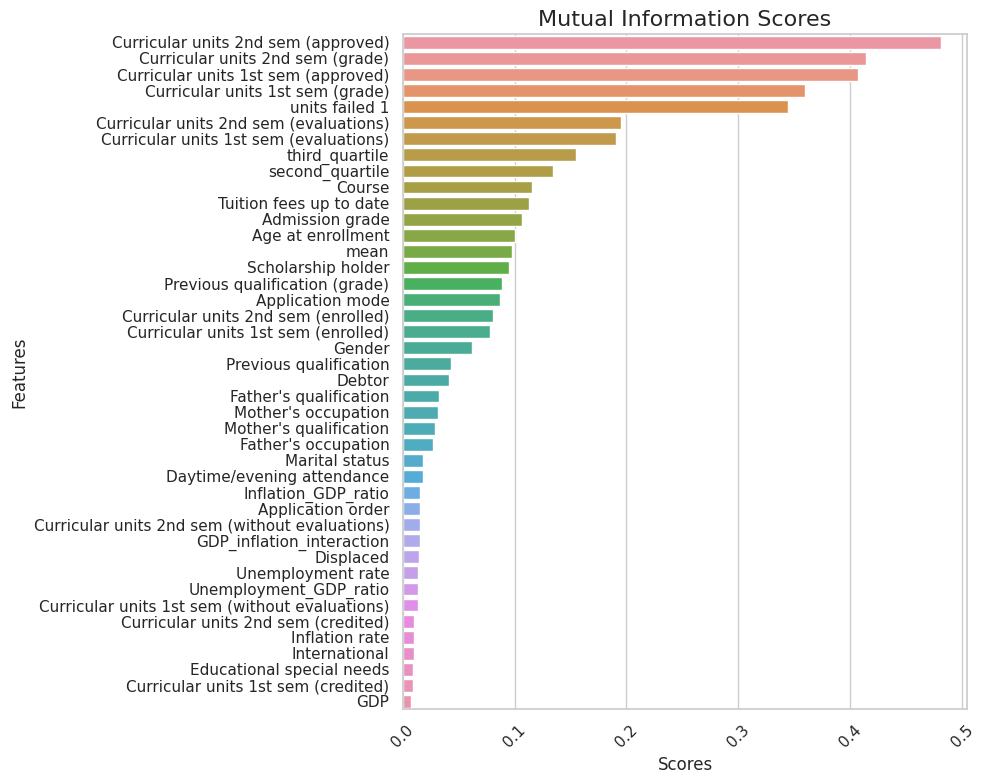

In [37]:
plt.figure(figsize=(10,8))

#Create the barplot
sns.barplot(x="Scores",y="Features",data=mi_scores)

#Add a title
plt.title("Mutual Information Scores",fontsize=16)

#Rotate the y-axis labels(if needed)
plt.yticks(rotation=0)

#Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

#Display the plot
plt.tight_layout()
plt.show()

In [38]:
x.drop(low_score_feature_names,axis=1,inplace=True)
test_df.drop(low_score_feature_names,axis=1,inplace=True)

# 6.Feature Scaling

In [39]:
scaler=StandardScaler()


In [40]:
x_scaled=scaler.fit_transform(x)

In [41]:
test_df_scaled=scaler.fit_transform(test_df)

In [42]:
set(x.columns)-set(test_df.columns)

set()

# 7.Implementing PCA

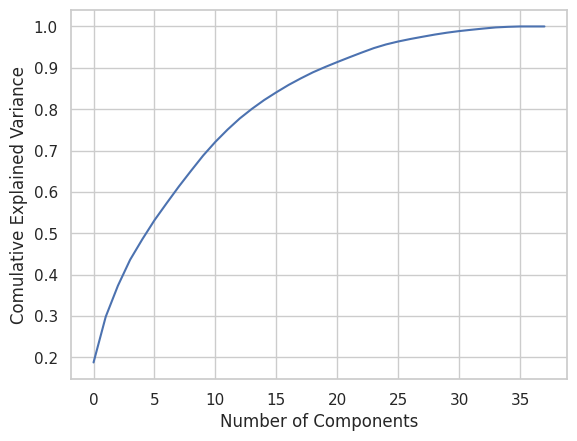

In [43]:
pca=PCA()
pca.fit(x_scaled)
explained_variance_ratio=pca.explained_variance_ratio_
commulative_variance_ratio=explained_variance_ratio.cumsum()

plt.plot(commulative_variance_ratio)
plt.xlabel("Number of Components")
plt.ylabel("Comulative Explained Variance")
plt.show()

In [44]:
##PCA-Transformation
pca=PCA(n_components=35)
pca

PCA(n_components=35)

In [45]:
#Scaled Data
x_scaled=pca.fit_transform(x_scaled)

In [46]:
test_df_scaled=pca.transform(test_df_scaled)

# |8.Dividing in train test split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Split the data into training and testing for scaled**

In [48]:
x_train_scaled,x_test_scaled,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

# 5|Baseline Model Building

In [49]:
Training_Accuracy=[]
Testing_Accuracy=[]

#For scaled data
def model_prediction(model,x,y,n_splits,random_state):
    skf=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=random_state)
    training_score=[]
    testing_score=[]
    precision=[]
    recall=[]
    f1_score_=[]
    
    x=pd.DataFrame(x)#Convert x to DataFrame
    for train_index,test_index in skf.split(x,y):
        x_train,x_test=x.iloc[train_index],x.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
         
        model.fit(x_train,y_train)
        x_train_pred=model.predict(x_train)
        x_test_pred=model.predict(x_test)
        
        a=accuracy_score(y_train,x_train_pred)*100
        b=accuracy_score(y_test,x_test_pred)*100
        c=precision_score(y_test,x_test_pred,average="weighted")
        d=recall_score(y_test,x_test_pred,average="weighted")
        e=f1_score(y_test,x_test_pred,average="weighted")
        
        training_score.append(a)
        testing_score.append(b)
        precision.append(c)
        recall.append(d)
        f1_score_.append(e)
        
    print("\n---------------------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:",np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:",np.mean(testing_score))
    print(f"Mean Precision_Score of {model} model is:",np.mean(precision))
    print(f"Mean Recall_Score of {model} is:",np.mean(recall))
    print(f"Mean f1_Score of {model} is:",np.mean(f1_score_))
        
        #Classification report and confusion matrix
    print("\n-----------------------------------------------------------------------------------------")
    print("Classification Report of {model} model is:")
    print(classification_report(y_test,x_test_pred))
        
    print("\n------------------------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm=confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
        
    Training_Accuracy.append(np.mean(training_score))
    Testing_Accuracy.append(np.mean(testing_score))

**models trained on scaled data**

# 1.SGD Classifier

In [50]:
sgd_model=SGDClassifier()


---------------------------------------------------------------------------------------
Mean Accuracy_Score of SGDClassifier() model on Training Data is: 80.22001341204063
Mean Accuracy_Score of SGDClassifier() model on Testing Data is: 80.03345617686355
Mean Precision_Score of SGDClassifier() model is: 0.79361352034241
Mean Recall_Score of SGDClassifier() is: 0.8003345617686353
Mean f1_Score of SGDClassifier() is: 0.7909976340394301

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      5059
           1       0.61      0.47      0.53      2988
           2       0.80      0.94      0.86      7256

    accuracy                           0.80     15303
   macro avg       0.77      0.73      0.75     15303
weighted avg       0.80      0.80      0.79     15303


---------------------------------------------

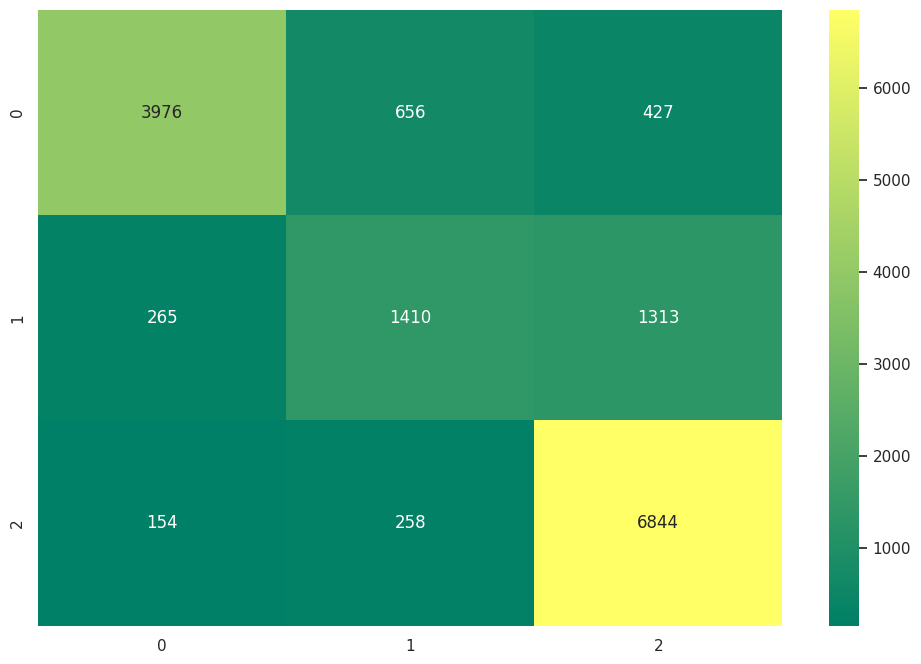

In [51]:
model_prediction(sgd_model,x_scaled,y,n_splits=5,random_state=42)

# 2.Logisitic Regression

In [52]:
LogisticRegression_model=LogisticRegression()




---------------------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 81.66150440350631
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 81.62262316881176
Mean Precision_Score of LogisticRegression() model is: 0.8135057725755928
Mean Recall_Score of LogisticRegression() is: 0.8162262316881176
Mean f1_Score of LogisticRegression() is: 0.8128629755661467

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5059
           1       0.62      0.57      0.59      2988
           2       0.83      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.77      0.77     15303
weighted avg       0.81      0.82      0.81     15303


------------------

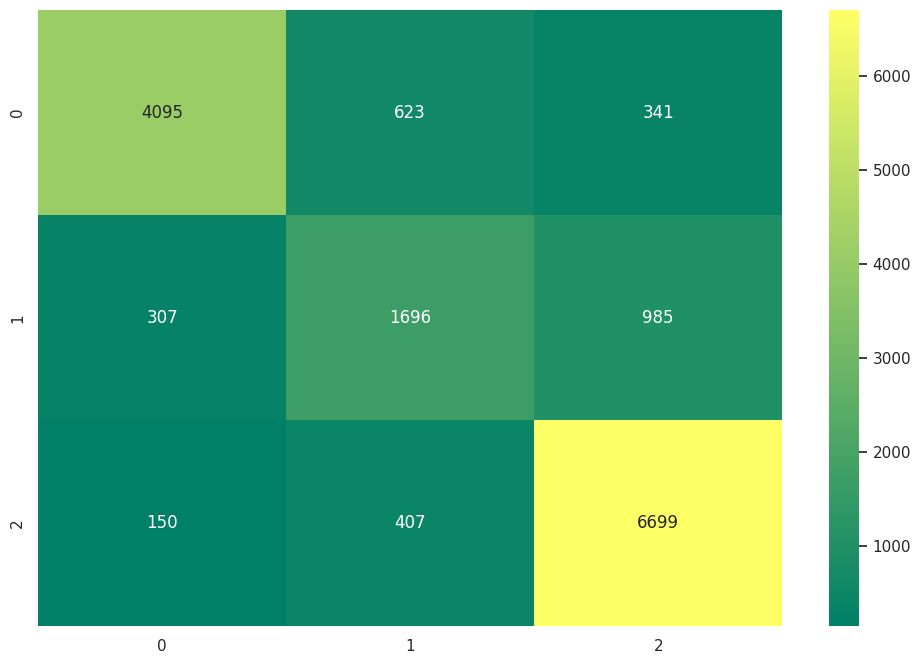

In [53]:
model_prediction(LogisticRegression_model,x_scaled,y,n_splits=5,random_state=42)

# 3.K Nearest Neighbor

In [54]:
KNN_Model=KNeighborsClassifier()



---------------------------------------------------------------------------------------
Mean Accuracy_Score of KNeighborsClassifier() model on Training Data is: 84.02140663393638
Mean Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 77.99210956965173
Mean Precision_Score of KNeighborsClassifier() model is: 0.7743529325484884
Mean Recall_Score of KNeighborsClassifier() is: 0.7799210956965175
Mean f1_Score of KNeighborsClassifier() is: 0.776117567197021

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5059
           1       0.55      0.49      0.52      2988
           2       0.82      0.88      0.85      7256

    accuracy                           0.78     15303
   macro avg       0.74      0.73      0.73     15303
weighted avg       0.77      0.78      0.78     15303


---------

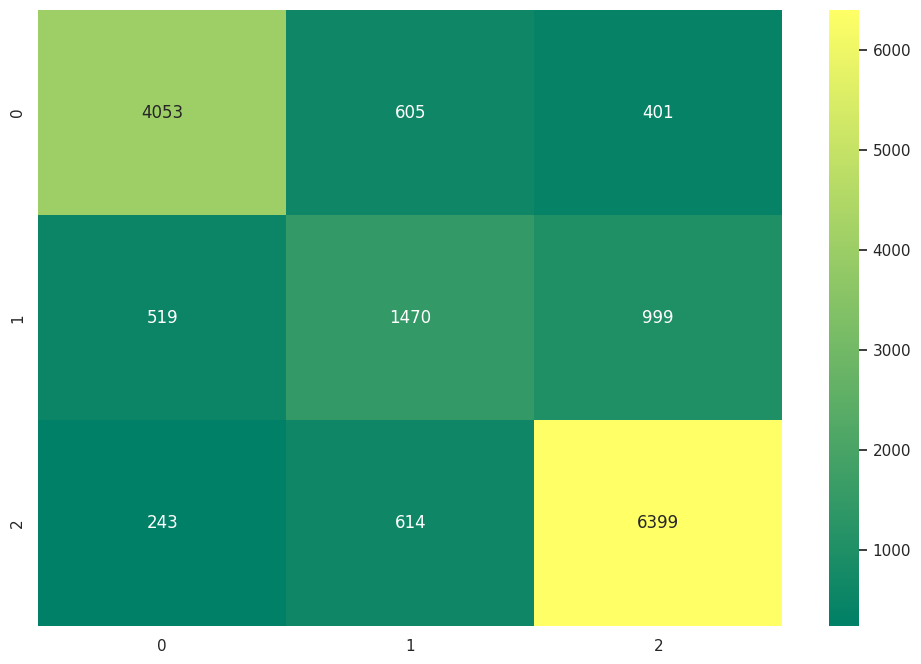

In [55]:
model_prediction(KNN_Model,x_scaled,y,n_splits=5,random_state=42)

# 4.Naive Bayes

In [56]:
NB_model=GaussianNB()



---------------------------------------------------------------------------------------
Mean Accuracy_Score of GaussianNB() model on Training Data is: 73.95188020449352
Mean Accuracy_Score of GaussianNB() model on Testing Data is: 73.91986934493028
Mean Precision_Score of GaussianNB() model is: 0.7240209584520623
Mean Recall_Score of GaussianNB() is: 0.7391986934493027
Mean f1_Score of GaussianNB() is: 0.7270179717923879

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      5059
           1       0.54      0.37      0.44      2988
           2       0.77      0.86      0.81      7256

    accuracy                           0.74     15303
   macro avg       0.70      0.67      0.68     15303
weighted avg       0.73      0.74      0.73     15303


----------------------------------------------------------

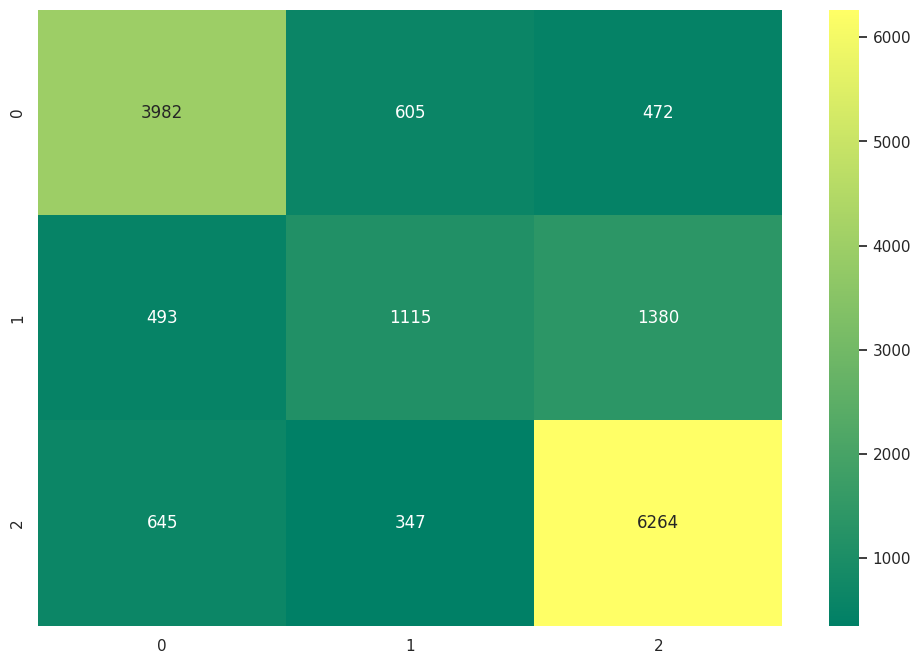

In [57]:
model_prediction(NB_model,x_scaled,y,n_splits=5,random_state=42)

# 5.Decision Tree

In [58]:
DecisionTreeClassifier_model=DecisionTreeClassifier()



---------------------------------------------------------------------------------------
Mean Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Mean Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.23612695958438
Mean Precision_Score of DecisionTreeClassifier() model is: 0.7447296198490588
Mean Recall_Score of DecisionTreeClassifier() is: 0.7423612695958437
Mean f1_Score of DecisionTreeClassifier() is: 0.7434886134804366

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5059
           1       0.47      0.50      0.49      2988
           2       0.82      0.81      0.82      7256

    accuracy                           0.74     15303
   macro avg       0.70      0.70      0.70     15303
weighted avg       0.74      0.74      0.74     15303


----------

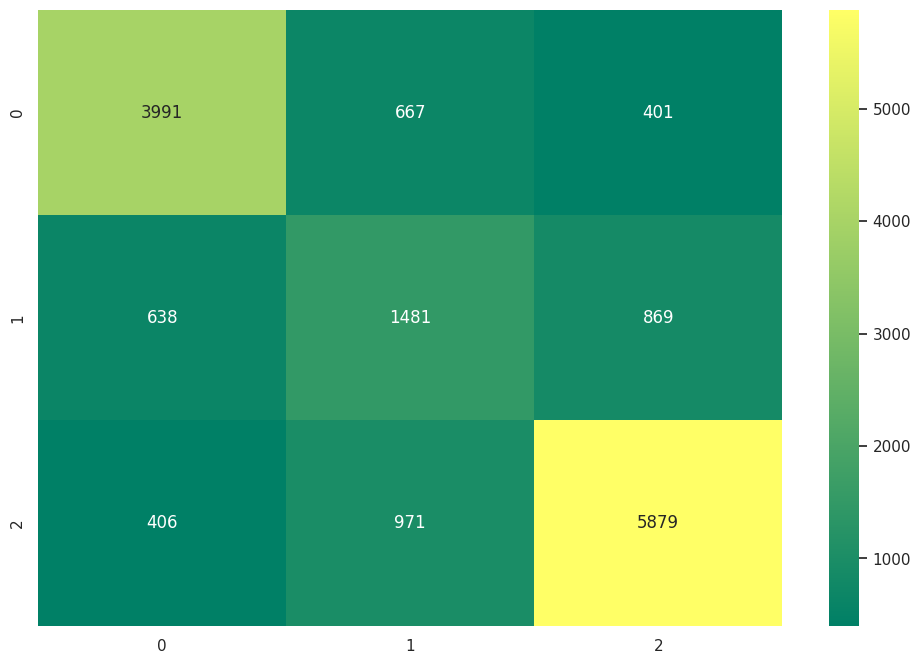

In [59]:
model_prediction(DecisionTreeClassifier_model,x,y,n_splits=5,random_state=42)

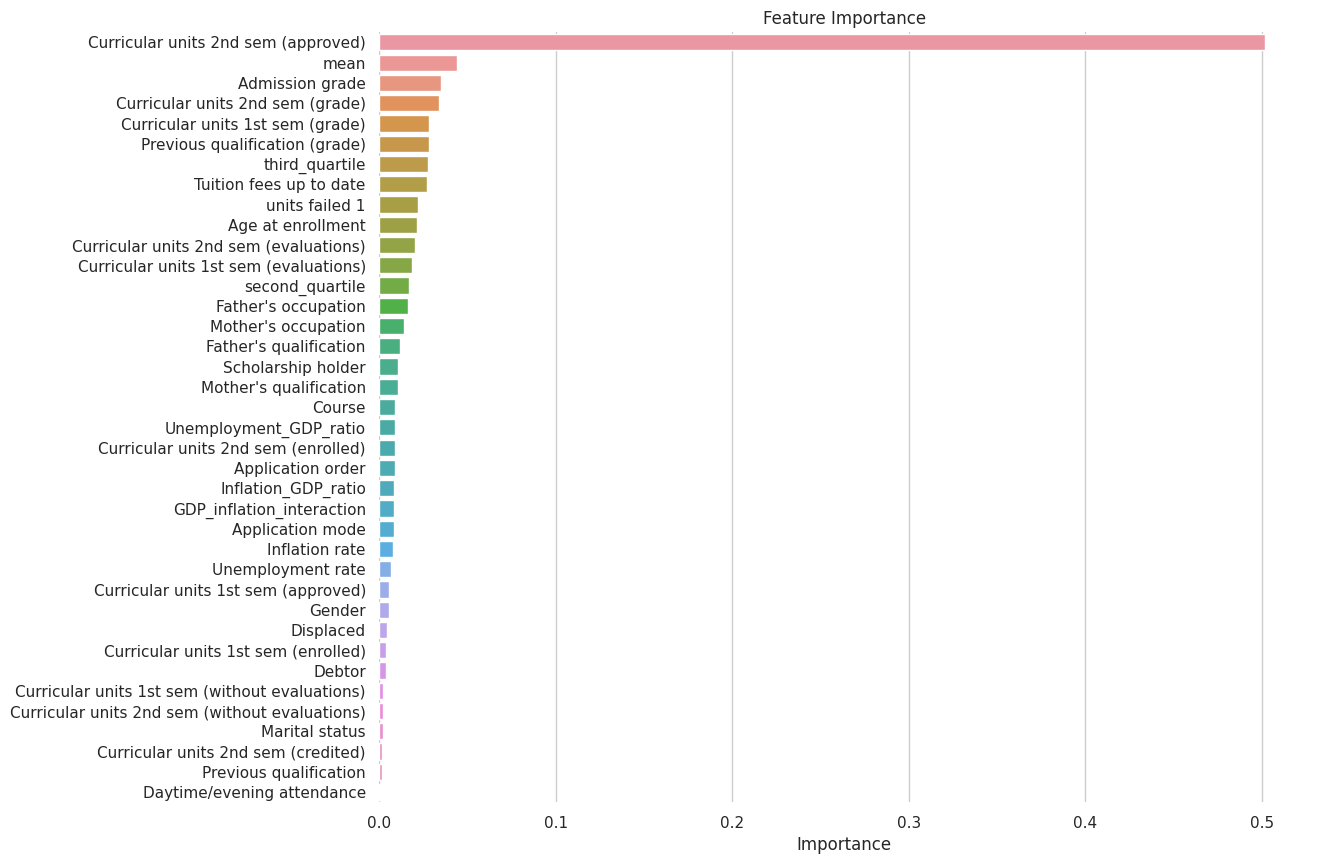

In [60]:
#feature importances
feature_importance=DecisionTreeClassifier_model.feature_importances_
feature_importance_df=pd.DataFrame({"Feature":x.columns,"Importance":feature_importance})
feature_importance_df=feature_importance_df.sort_values(by="Importance",ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(x="Importance",y="Feature",data=feature_importance_df)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("")
sns.despine(left=True,bottom=True)
plt.show()

# 6.Extra Tree Classifier

In [61]:
ETCLF_model=ExtraTreesClassifier()



---------------------------------------------------------------------------------------
Mean Accuracy_Score of ExtraTreesClassifier() model on Training Data is: 100.0
Mean Accuracy_Score of ExtraTreesClassifier() model on Testing Data is: 82.09832775393063
Mean Precision_Score of ExtraTreesClassifier() model is: 0.819333831422177
Mean Recall_Score of ExtraTreesClassifier() is: 0.8209832775393062
Mean f1_Score of ExtraTreesClassifier() is: 0.8185330245950688

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.90      0.82      0.85      5059
           1       0.63      0.58      0.61      2988
           2       0.84      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.77      0.78     15303
weighted avg       0.82      0.82      0.82     15303


---------------------

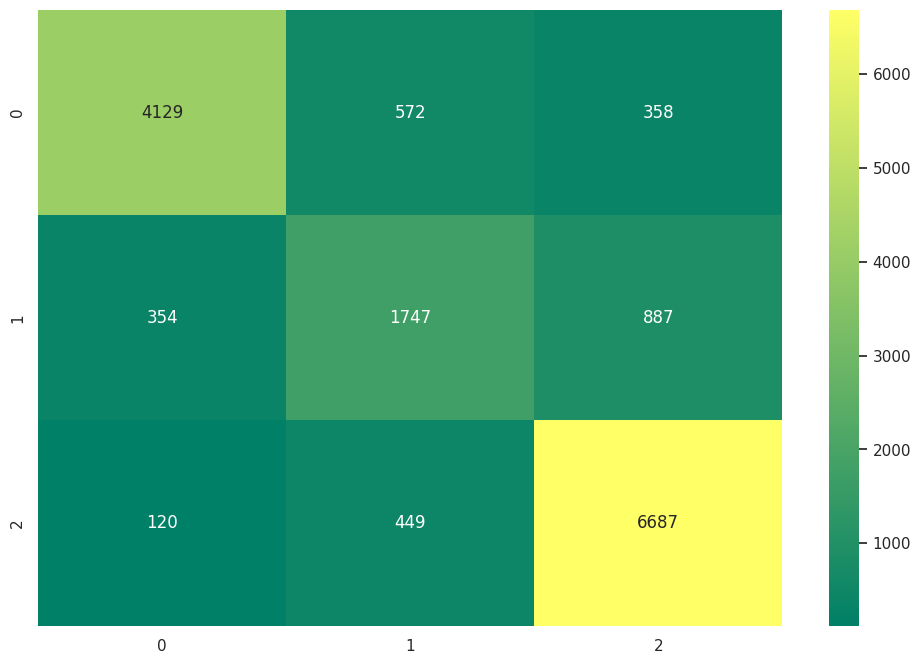

In [62]:
model_prediction(ETCLF_model,x,y,n_splits=5,random_state=42)

In [63]:
def important_features(model,x):

    feature_importance_df=pd.DataFrame({"Features":x.columns,"Importance":model.feature_importances_})
    feature_importance_df=feature_importance_df.sort_values(by="Importance",ascending=False)
    plt.figure(figsize=(18,8))
    sns.barplot(x="Importance",y="Features",data=feature_importance_df)
    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("")
    sns.despine(left=True,bottom=True)
    plt.show()

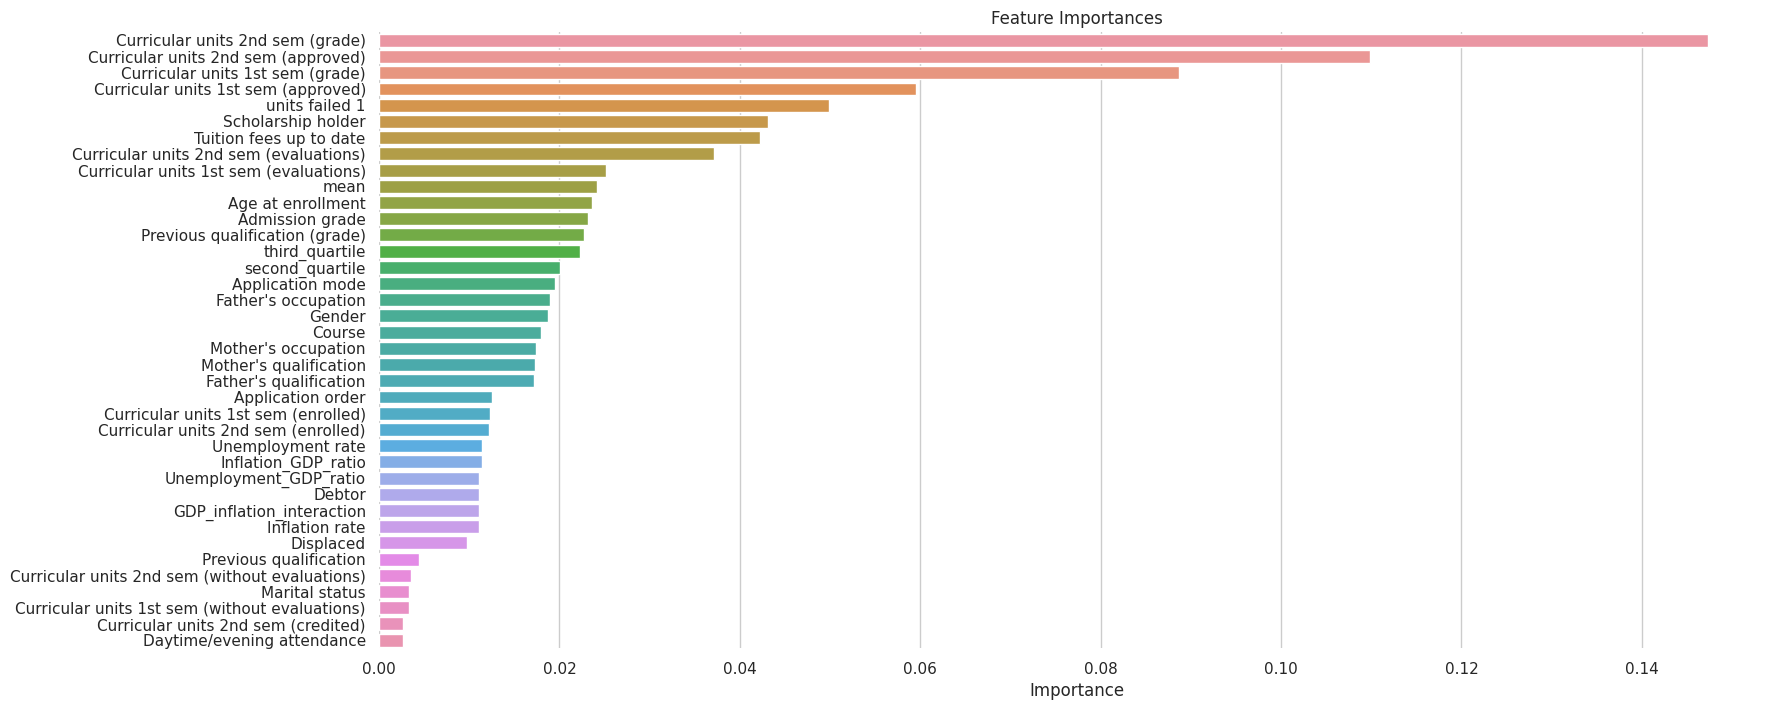

In [64]:
important_features(ETCLF_model,x)

# 7.Random Forest

In [65]:
RF_model=RandomForestClassifier()


---------------------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 99.99901984273916
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 82.44464705440092
Mean Precision_Score of RandomForestClassifier() model is: 0.8226371910891759
Mean Recall_Score of RandomForestClassifier() is: 0.8244464705440091
Mean f1_Score of RandomForestClassifier() is: 0.8220721704695283

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5059
           1       0.63      0.59      0.61      2988
           2       0.84      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.78      0.78     15303
weighted avg       0.82      0.82      0.82     15303


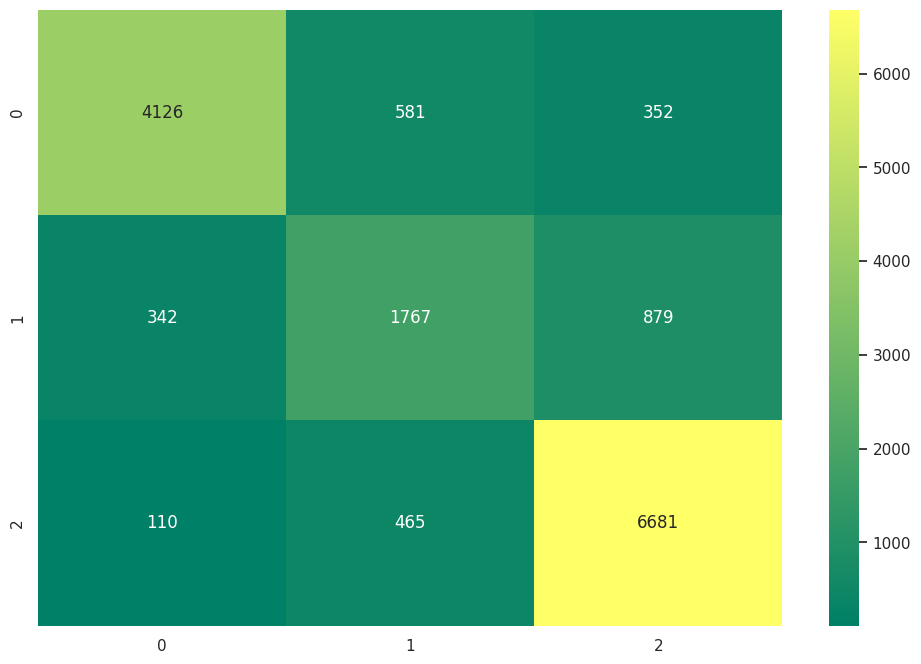

In [66]:
model_prediction(RF_model,x,y,n_splits=5,random_state=42)

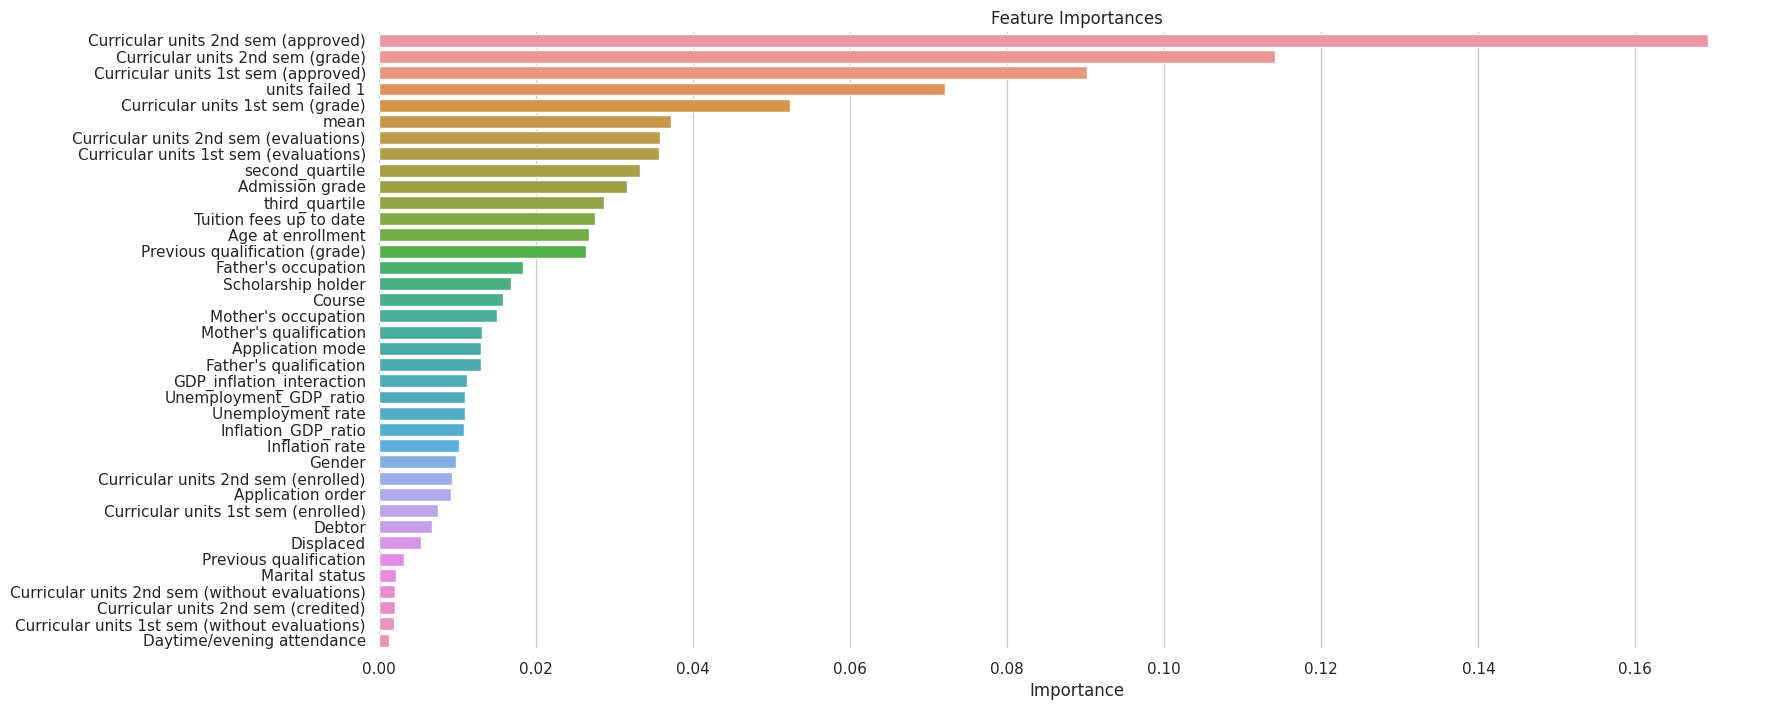

In [67]:
important_features(RF_model,x)

# 8.Ada Boost

In [68]:
AdaBoostClassifier_model=AdaBoostClassifier()



---------------------------------------------------------------------------------------
Mean Accuracy_Score of AdaBoostClassifier() model on Training Data is: 82.08885431423376
Mean Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 81.98463045095107
Mean Precision_Score of AdaBoostClassifier() model is: 0.8183184459965952
Mean Recall_Score of AdaBoostClassifier() is: 0.8198463045095107
Mean f1_Score of AdaBoostClassifier() is: 0.8177235486286472

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5059
           1       0.63      0.59      0.61      2988
           2       0.85      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.78      0.78     15303
weighted avg       0.82      0.82      0.82     15303


------------------

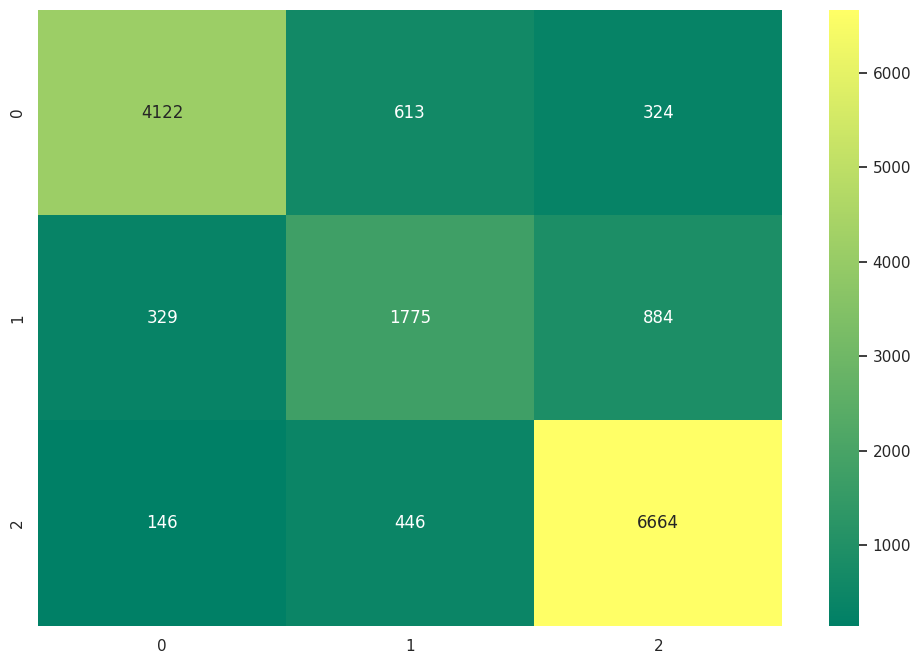

In [69]:
model_prediction(AdaBoostClassifier_model,x,y,n_splits=5,random_state=42)

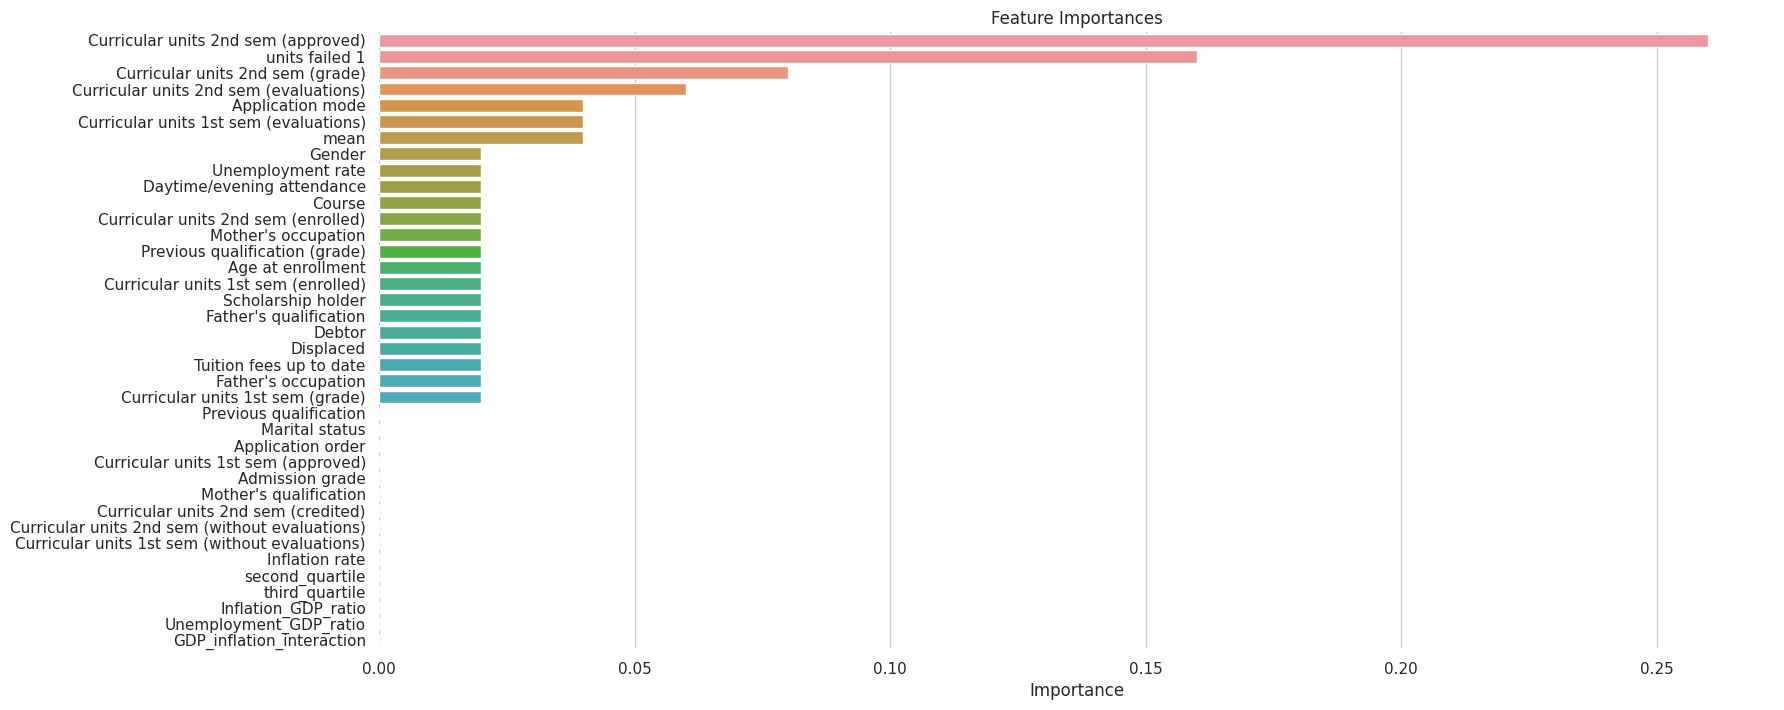

In [70]:
important_features(AdaBoostClassifier_model,x)

# 9.Gradient Boost

In [71]:
GB_model=GradientBoostingClassifier()


---------------------------------------------------------------------------------------
Mean Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 83.08110511651691
Mean Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 82.7125634239247
Mean Precision_Score of GradientBoostingClassifier() model is: 0.825630060709987
Mean Recall_Score of GradientBoostingClassifier() is: 0.8271256342392471
Mean f1_Score of GradientBoostingClassifier() is: 0.8250473213700724

-----------------------------------------------------------------------------------------
Classification Report of {model} model is:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5059
           1       0.64      0.61      0.62      2988
           2       0.85      0.92      0.88      7256

    accuracy                           0.83     15303
   macro avg       0.80      0.78      0.79     15303
weighted avg       0.83      0.83   

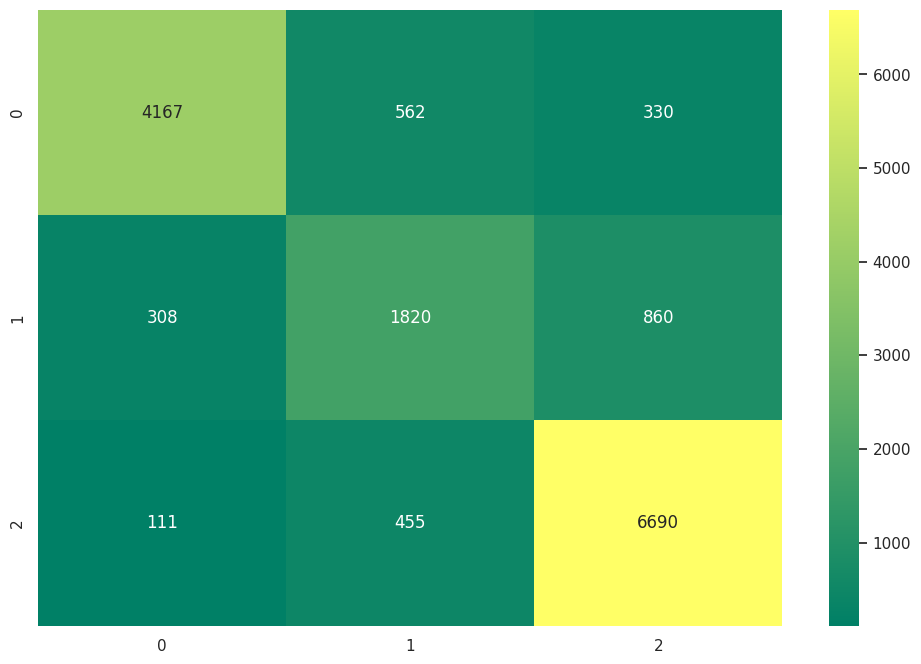

In [72]:
model_prediction(GB_model,x,y,n_splits=5,random_state=42)

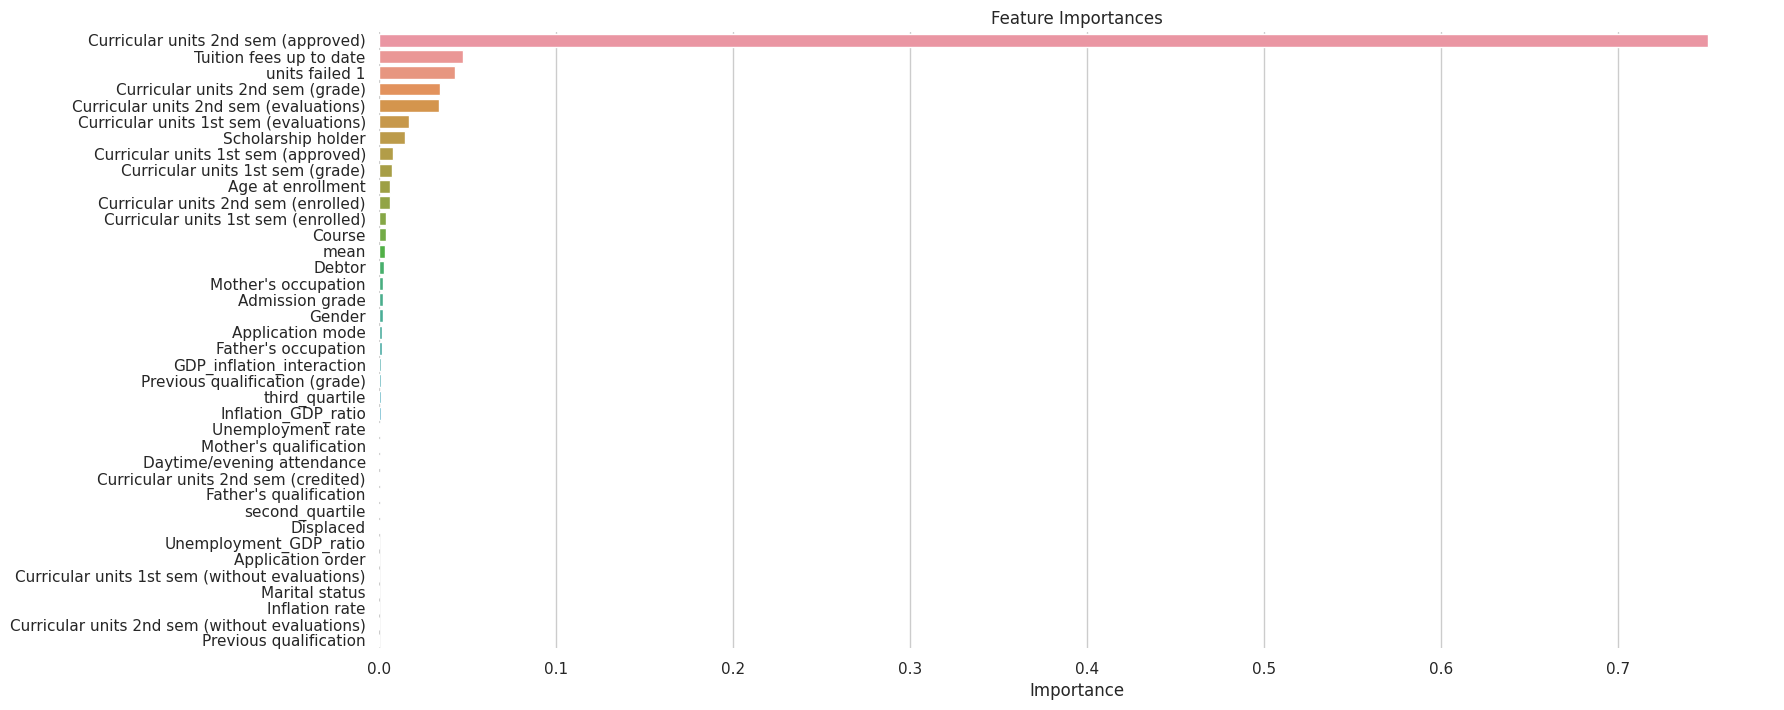

In [73]:
important_features(GB_model,x)

# 10.XG Boost

In [74]:
XGBClassifier_model=XGBClassifier()


---------------------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) model on Training Data is: 88.57523748016797
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callback

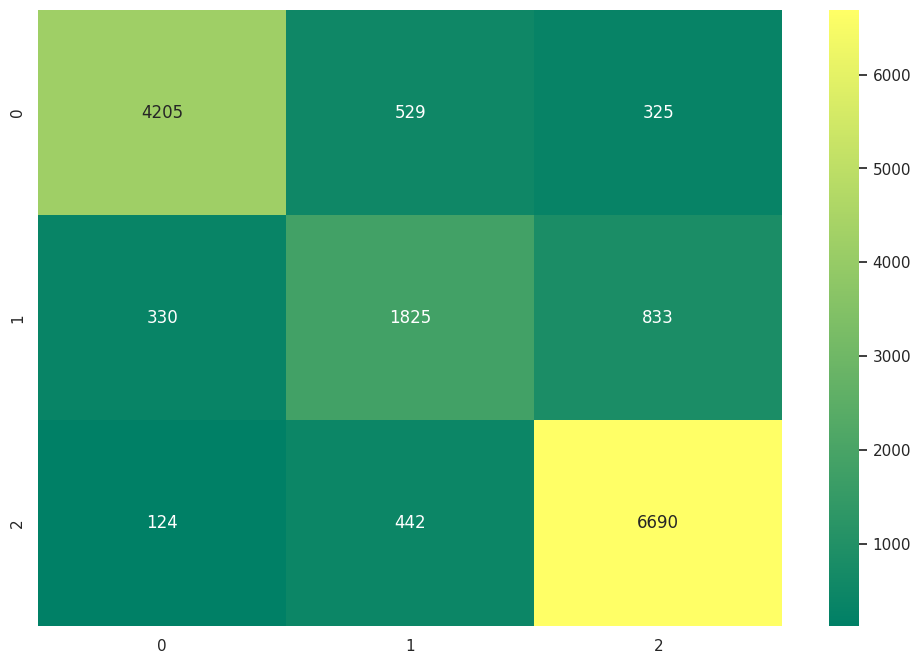

In [75]:
model_prediction(XGBClassifier_model,x,y,n_splits=5,random_state=42)

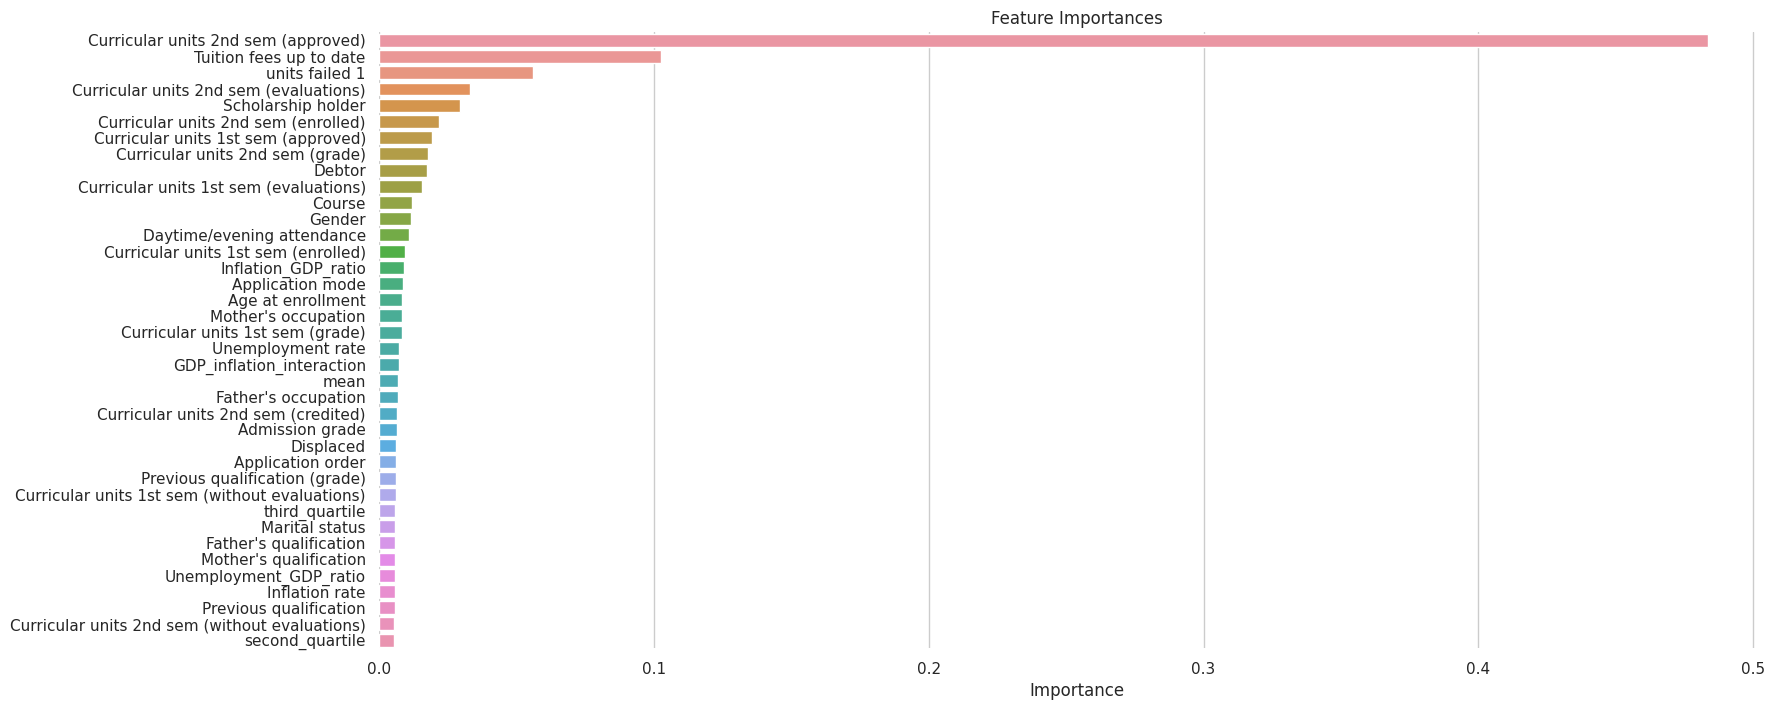

In [76]:
important_features(XGBClassifier_model,x)

# 11.Cat Boost

In [77]:
CatBoost_model=CatBoostClassifier()

Learning rate set to 0.097601
0:	learn: 0.9938372	total: 85.9ms	remaining: 1m 25s
1:	learn: 0.9137248	total: 116ms	remaining: 57.7s
2:	learn: 0.8506659	total: 146ms	remaining: 48.6s
3:	learn: 0.7979385	total: 177ms	remaining: 44.2s
4:	learn: 0.7534987	total: 211ms	remaining: 41.9s
5:	learn: 0.7182796	total: 240ms	remaining: 39.7s
6:	learn: 0.6881609	total: 273ms	remaining: 38.7s
7:	learn: 0.6614808	total: 307ms	remaining: 38s
8:	learn: 0.6382693	total: 339ms	remaining: 37.4s
9:	learn: 0.6185962	total: 372ms	remaining: 36.8s
10:	learn: 0.6002738	total: 403ms	remaining: 36.2s
11:	learn: 0.5849901	total: 435ms	remaining: 35.8s
12:	learn: 0.5716056	total: 467ms	remaining: 35.4s
13:	learn: 0.5610414	total: 496ms	remaining: 34.9s
14:	learn: 0.5505214	total: 528ms	remaining: 34.7s
15:	learn: 0.5414660	total: 558ms	remaining: 34.3s
16:	learn: 0.5339108	total: 591ms	remaining: 34.2s
17:	learn: 0.5273921	total: 620ms	remaining: 33.8s
18:	learn: 0.5205182	total: 653ms	remaining: 33.7s
19:	learn: 

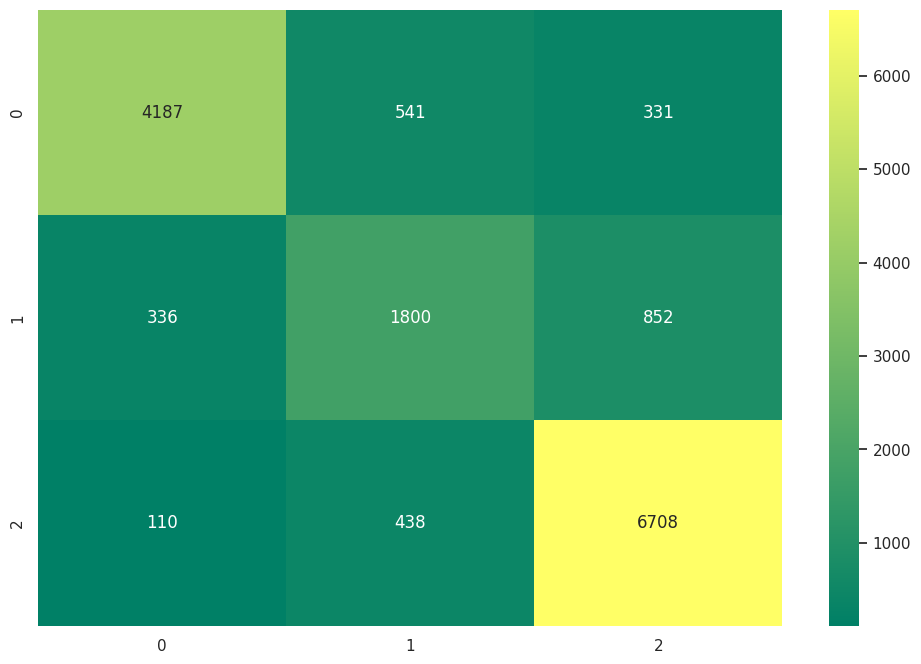

In [78]:
model_prediction(CatBoost_model,x,y,n_splits=5,random_state=42)

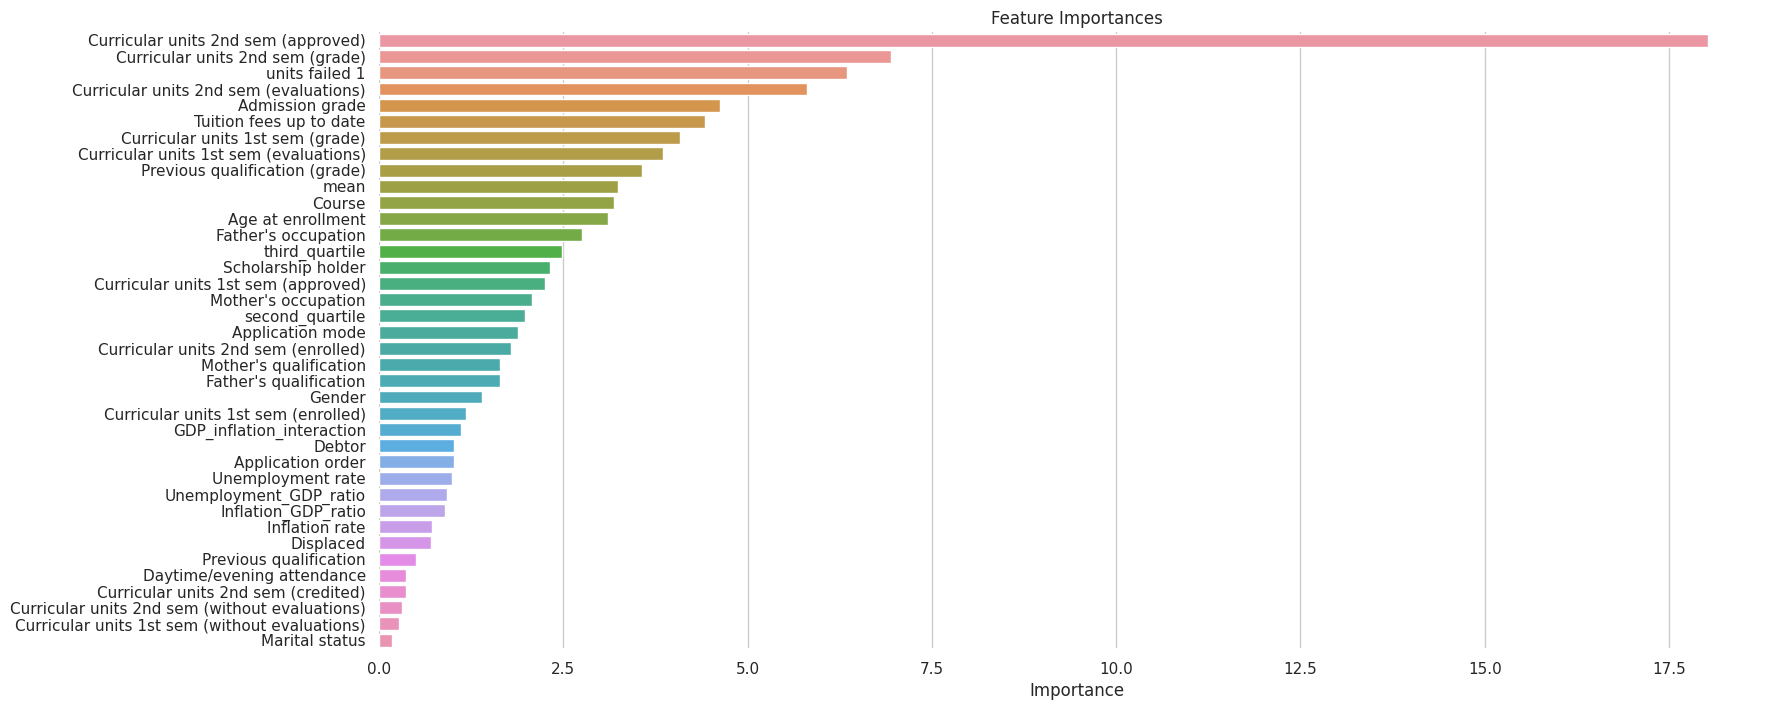

In [79]:
important_features(CatBoost_model,x)

# 12.LGBM 

In [80]:
LGBM_model=LGBMClassifier()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1978
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 38
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 61214, 

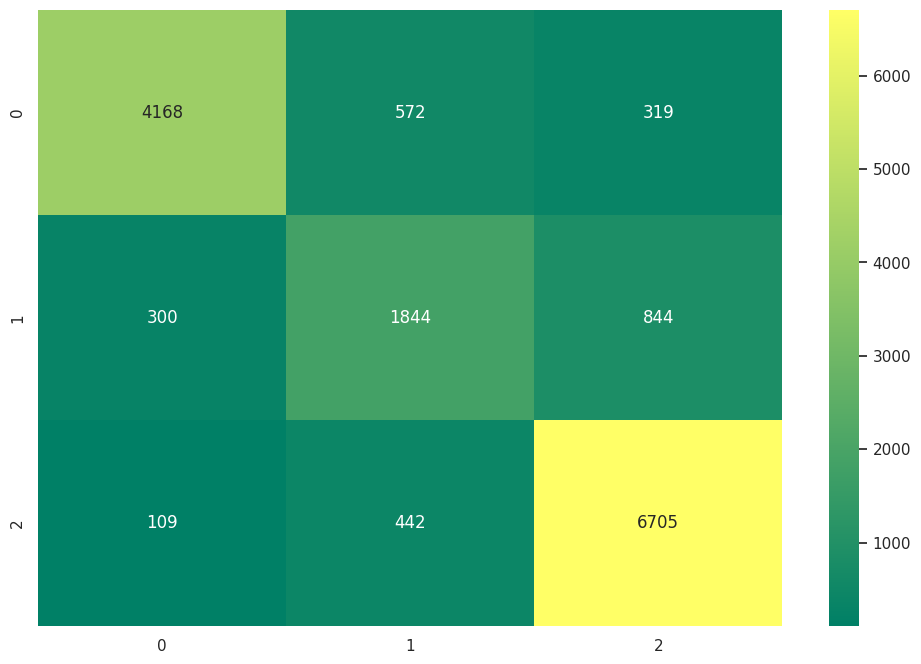

In [81]:
model_prediction(LGBM_model,x,y,n_splits=5,random_state=42)

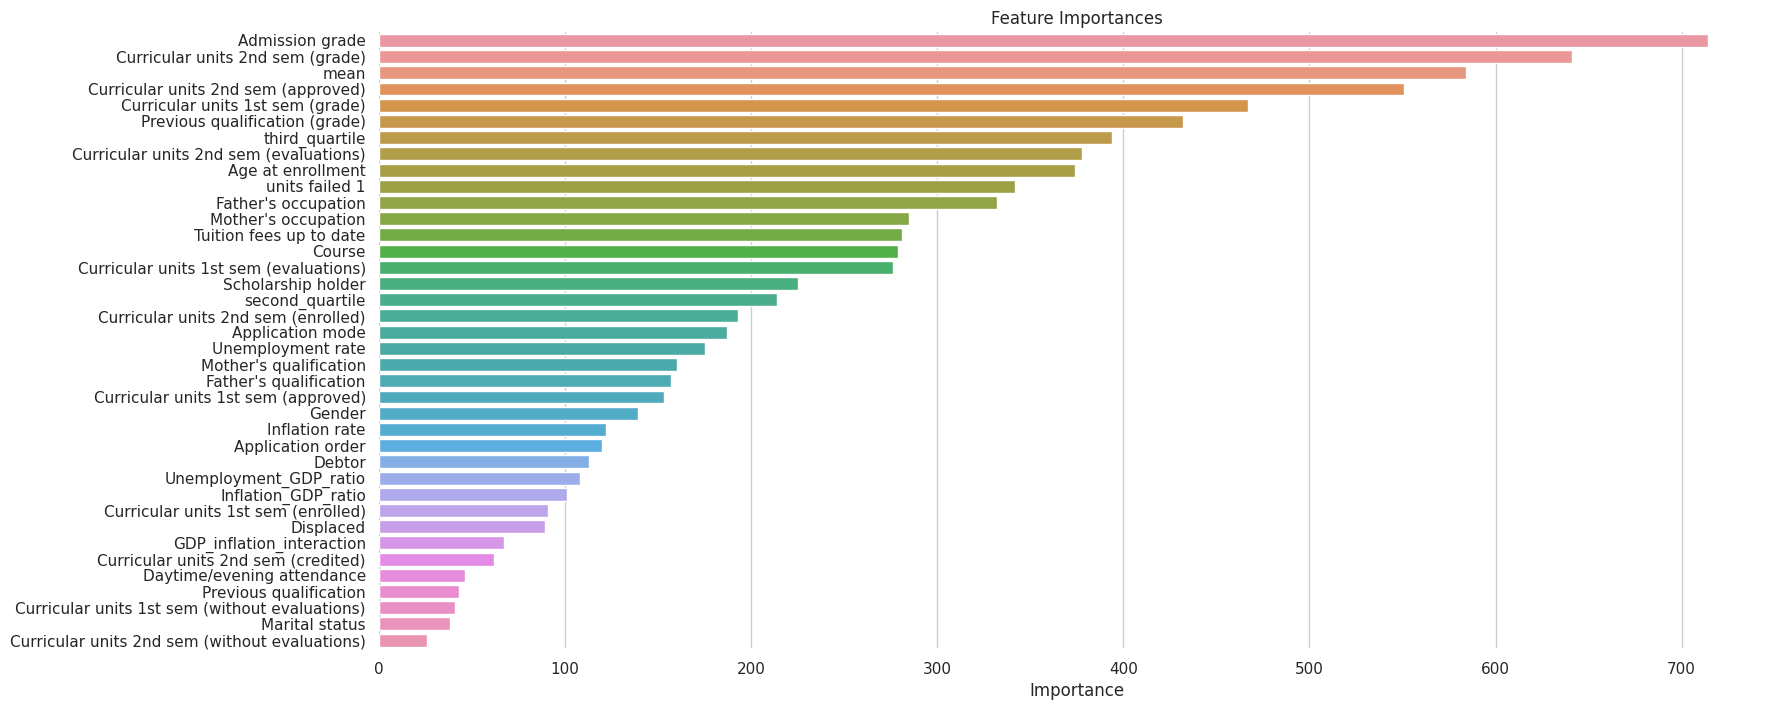

In [82]:
important_features(LGBM_model,x)

The performance of machine learning models can be influenced by whether the input features are scaled or not. Here’s a breakdown of the listed models and how they typically respond to scaling:

**Models that Perform Better with Scaling:**
1.**SGDClassifier:** Stochastic Gradient Descent is highly sensitive to feature scaling. Scaling the features can significantly improve performance and convergence speed.

2.**Logistic Regression:** This model also benefits from feature scaling, especially when using gradient-based solvers. It ensures that the coefficients are updated uniformly.

3.**K-Nearest Neighbors (KNN):** KNN calculates distances between data points. Without scaling, features with larger ranges can dominate the distance calculation, so scaling is crucial.

4.**Naive Bayes:** Although not always necessary, scaling can sometimes improve performance, especially with Gaussian Naive Bayes where the assumption is that data follows a Gaussian distribution.

5.**Support Vector Machines (SVMs):** Though not listed, it's worth mentioning that SVMs also benefit significantly from scaling due to the way they compute margins.

**Models that are Less Sensitive to Scaling:**

Decision Tree: Trees split data based on feature values, so scaling does not affect their performance. However, if used in conjunction with methods that do benefit from scaling (e.g., Gradient Boosting), scaling might help.

Random Forest: Similar to decision trees, Random Forests are not sensitive to feature scaling as they rely on the inherent hierarchical structure of the data.

AdaBoost: While not explicitly dependent on scaling, boosting algorithms can sometimes benefit from scaling because they build multiple weak learners. The individual weak learners can sometimes perform better if features are scaled.

Gradient Boosting (GBoost): Generally not sensitive to scaling, but like AdaBoost, sometimes benefits slightly from it.

XGBoost: This gradient boosting implementation is generally robust to scaling, though minor improvements can sometimes be observed with scaling.

CatBoost: This boosting algorithm is designed to handle categorical data efficiently and does not require feature scaling.

LightGBM (LGBM): Similar to XGBoost, it is robust to feature scaling, though minor improvements can sometimes be observed.

Summary:
Scale the features for better performance:

SGDClassifier
Logistic Regression
KNN
Naive Bayes (Gaussian)

Less sensitive to scaling:

Decision Tree
Random Forest
AdaBoost
GBoost
XGBoost
CatBoost
LGBM

Scaling the features is generally good practice, especially when using algorithms that are sensitive to the scale of the data. Standardization (mean = 0, variance = 1) or normalization (scaling features to a range) are common techniques used for this purpose.

# Comparing Performance

In [83]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [84]:
#Sort by Testing_Accuracy
Acc_df=Acc_df.sort_values(by="Testing_Accuracy",ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0                catbost          86.458742         83.113775
1                   LGBM          85.177670         83.111161
2                XGBoost          88.575237         83.100705
3                 GBoost          83.081105         82.712563
4           RandomForest          99.999020         82.444647
5   ExtraTree_Classifier         100.000000         82.098328
6               Adaboost          82.088854         81.984630
7    Logistic_Regression          81.661504         81.622623
8          SGD_classifer          80.220013         80.033456
9                    KNN          84.021407         77.992110
10          DecisionTree         100.000000         74.236127
11           Naive_Bayes          73.951880         73.919869

# 6|Hypertuning XG Boost

# 1.Hypertung XGBoost

In [85]:
"""
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 6, 13)
    n_estimators = trial.suggest_int('n_estimators', 500, 5000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
    print('Training the model with', x_train.shape[1], 'features')
    
    params = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'gamma': gamma,
        'reg_alpha': reg_alpha,
        'reg_lambda': reg_lambda,
        'max_depth': max_depth,
        'min_child_weight': min_child_weight,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'eval_metric': 'mlogloss'
     }
    clf = XGBClassifier(**params,class_weight = class_weights_dict)
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(clf, x, y, cv=5, scoring='accuracy')
    
    validation_score = np.mean(cv_results['test_score'])
    
    return validation_score
    
"""

"\ndef objective(trial):\n    max_depth = trial.suggest_int('max_depth', 6, 13)\n    n_estimators = trial.suggest_int('n_estimators', 500, 5000)\n    gamma = trial.suggest_float('gamma', 0, 1)\n    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)\n    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)\n    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)\n    subsample = trial.suggest_float('subsample', 0.5, 1.0)\n    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)\n    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)\n    print('Training the model with', x_train.shape[1], 'features')\n    \n    params = {\n        'n_estimators': n_estimators,\n        'learning_rate': learning_rate,\n        'gamma': gamma,\n        'reg_alpha': reg_alpha,\n        'reg_lambda': reg_lambda,\n        'max_depth': max_depth,\n        'min_child_weight': min_child_weight,\n        'subsample': subsample,\n        'colsample_bytree': colsample_bytree

In [86]:
#study=optuna.create_study(direction="maximize")
#study.optimize(objective,n_trials=30)

In [87]:
#best_params=study.best_params
#prnt("Best Hyperparameter:",best_params)

In [88]:
best_params={'max_depth': 6,
             'n_estimators': 4937,
             'gamma': 0.8644097106882519,
             'reg_alpha': 0.4215206295140813,
             'reg_lambda': 0.6203345757486959,
             'min_child_weight': 9, 
             'subsample': 0.8694499955731673,
             'colsample_bytree': 0.5841425315961482,
             'learning_rate': 0.02302515234749565}

In [89]:
#Now you can use the best_params to train the final model
hypertuned_XGB_model=XGBClassifier(**best_params,eval_metric="mlogloss",num_class=3)


---------------------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5841425315961482, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.8644097106882519, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02302515234749565,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4937, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...) model on Training Data is: 88.08025570969305
Mean Accuracy_Score of XGBClassifi

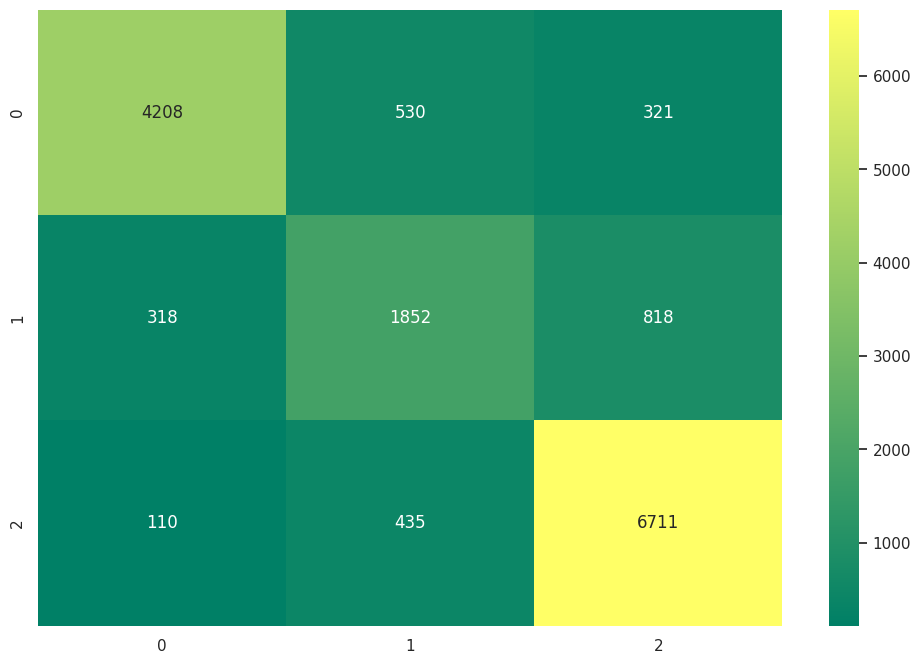

In [90]:
model_prediction(hypertuned_XGB_model,x,y,n_splits=5,random_state=42)

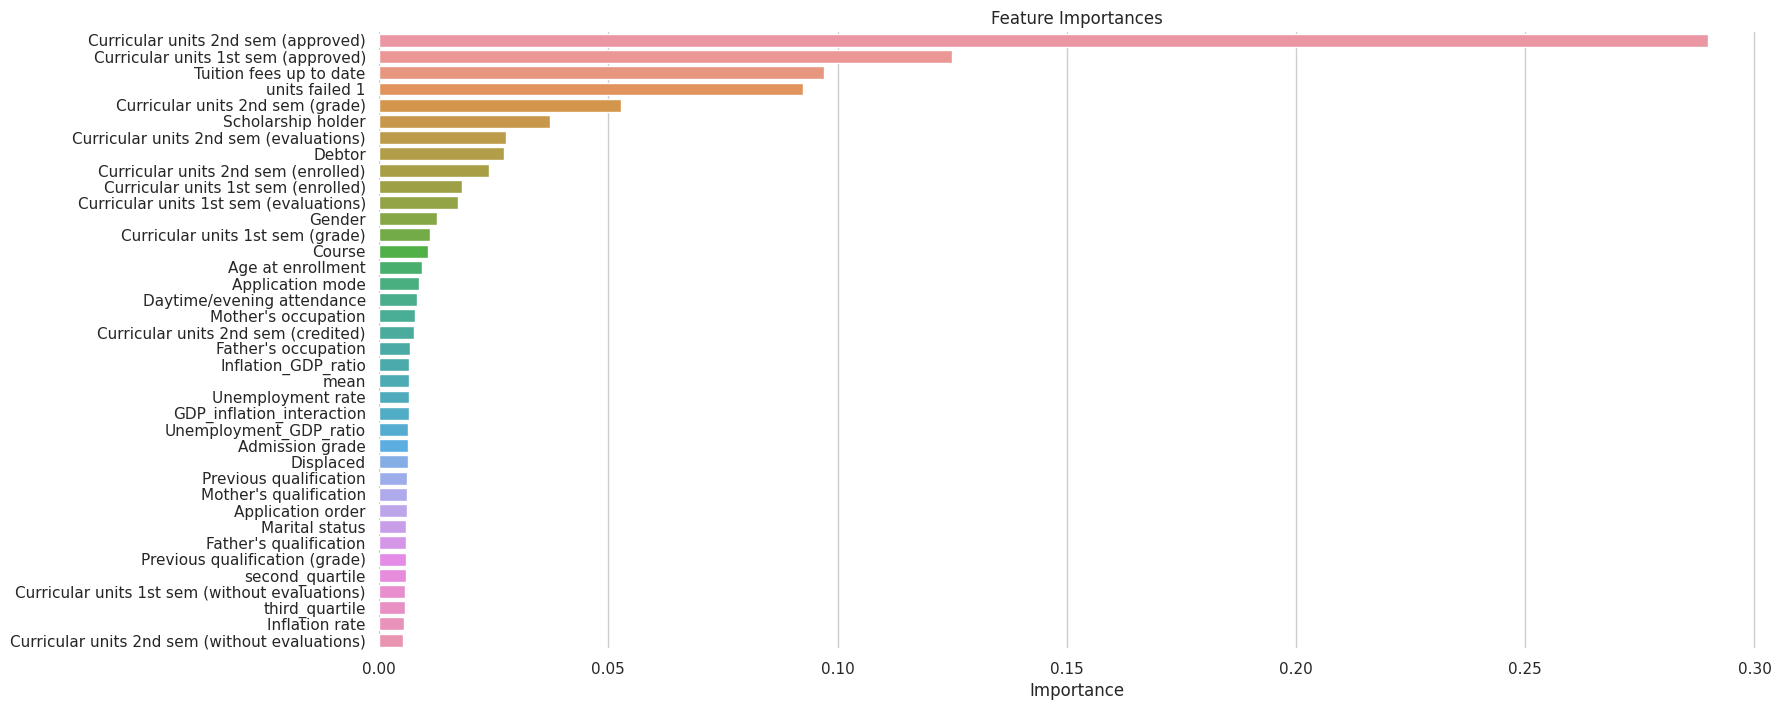

In [91]:
important_features(hypertuned_XGB_model,x)

# 2.Hypertung Catboost

In [92]:
best_params= {'iterations': 713, 'depth': 6, 'learning_rate': 0.0966120526714887, 'l2_leaf_reg': 0.061010894132361757, 'border_count': 248, 'random_strength': 0.011241881636142037, 'bagging_temperature': 0.014862947689211698, 'od_wait': 22}

In [93]:
hypertuned_cb_model=CatBoostClassifier(**best_params)

0:	learn: 0.9929894	total: 33.7ms	remaining: 24s
1:	learn: 0.9122820	total: 64.6ms	remaining: 23s
2:	learn: 0.8475467	total: 95.4ms	remaining: 22.6s
3:	learn: 0.7949287	total: 126ms	remaining: 22.4s
4:	learn: 0.7511397	total: 157ms	remaining: 22.2s
5:	learn: 0.7148436	total: 186ms	remaining: 21.9s
6:	learn: 0.6837798	total: 216ms	remaining: 21.8s
7:	learn: 0.6572162	total: 249ms	remaining: 21.9s
8:	learn: 0.6345630	total: 279ms	remaining: 21.9s
9:	learn: 0.6147315	total: 310ms	remaining: 21.8s
10:	learn: 0.5974280	total: 340ms	remaining: 21.7s
11:	learn: 0.5821618	total: 375ms	remaining: 21.9s
12:	learn: 0.5688829	total: 405ms	remaining: 21.8s
13:	learn: 0.5570370	total: 439ms	remaining: 21.9s
14:	learn: 0.5466366	total: 473ms	remaining: 22s
15:	learn: 0.5376551	total: 506ms	remaining: 22s
16:	learn: 0.5297049	total: 538ms	remaining: 22s
17:	learn: 0.5224623	total: 568ms	remaining: 21.9s
18:	learn: 0.5160230	total: 600ms	remaining: 21.9s
19:	learn: 0.5102683	total: 630ms	remaining: 21.

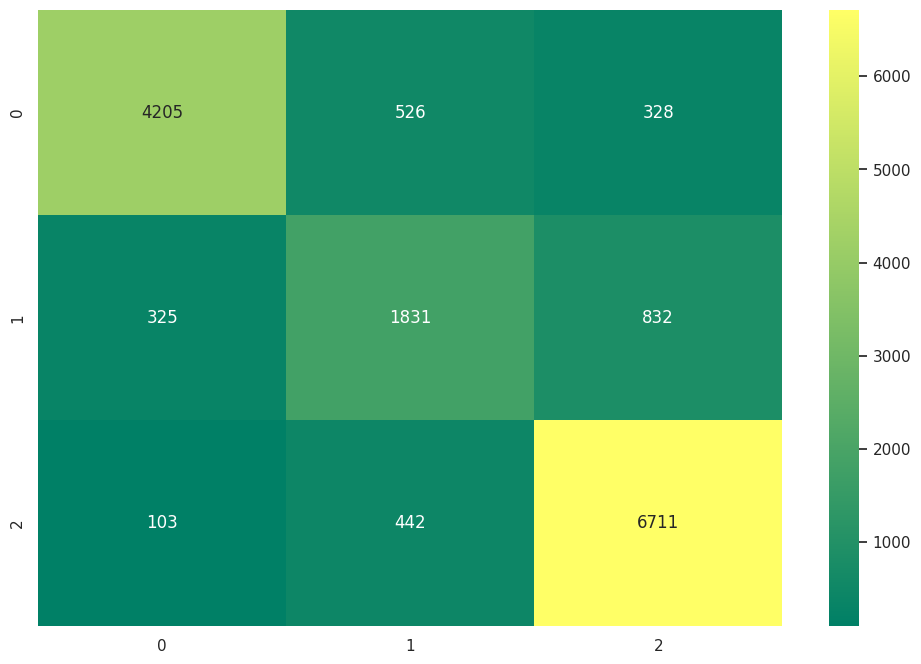

In [94]:
model_prediction(hypertuned_cb_model,x,y,n_splits=5,random_state=42)

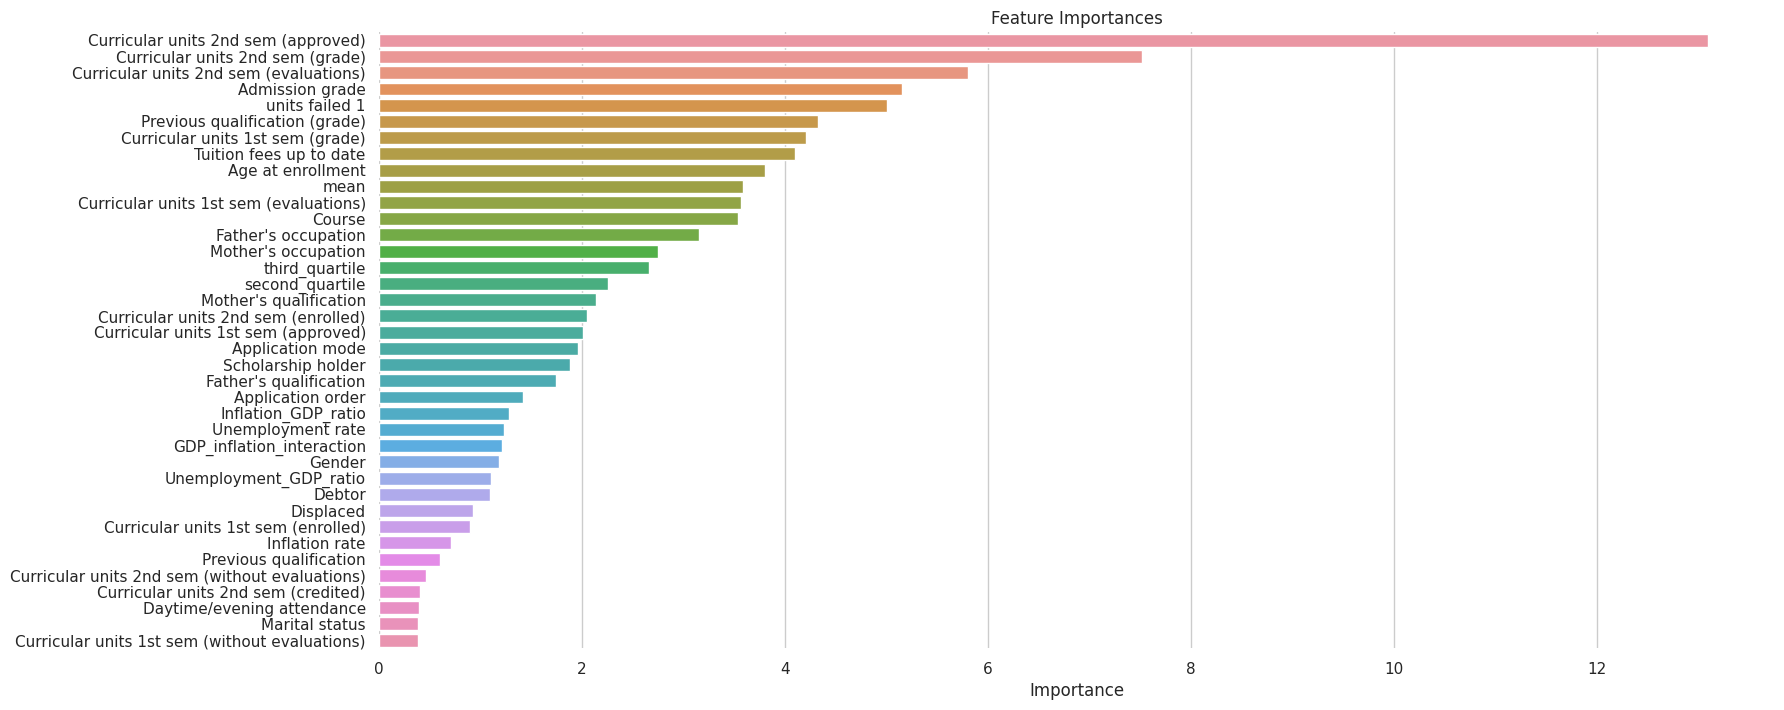

In [95]:
important_features(hypertuned_cb_model,x)

# 3.Hypertung LGBM

In [96]:
best_params = {
    'objective': 'multiclass',
    'boosting_type': 'goss',  # Gradient-based One-Side Sampling (GOSS)
    'tree_learner': 'feature', 
    'n_estimators': 743, 
    'learning_rate': 0.02636616162598401, 
    'num_leaves': 699, 
    'max_depth': 8, 
    'colsample_bytree': 0.7975468653525116, 
    'min_child_samples': 102, 
    'min_data_in_leaf': 5,  # min_sum_hessian_in_leaf seems to be replaced with min_data_in_leaf in newer versions
    'min_split_gain': 0.7247318987185962, 
    'max_bin': 156,
    'top_rate': 0.6132659772851583,
    'verbose': -1, 
    'random_state': 42,
}

In [97]:
hypertuned_LGBM_model=LGBMClassifier(**best_params)


---------------------------------------------------------------------------------------
Mean Accuracy_Score of LGBMClassifier(boosting_type='goss', colsample_bytree=0.7975468653525116,
               learning_rate=0.02636616162598401, max_bin=156, max_depth=8,
               min_child_samples=102, min_data_in_leaf=5,
               min_split_gain=0.7247318987185962, n_estimators=743,
               num_leaves=699, objective='multiclass', random_state=42,
               top_rate=0.6132659772851583, tree_learner='feature', verbose=-1) model on Training Data is: 88.75950730673445
Mean Accuracy_Score of LGBMClassifier(boosting_type='goss', colsample_bytree=0.7975468653525116,
               learning_rate=0.02636616162598401, max_bin=156, max_depth=8,
               min_child_samples=102, min_data_in_leaf=5,
               min_split_gain=0.7247318987185962, n_estimators=743,
               num_leaves=699, objective='multiclass', random_state=42,
               top_rate=0.6132659772851583, 

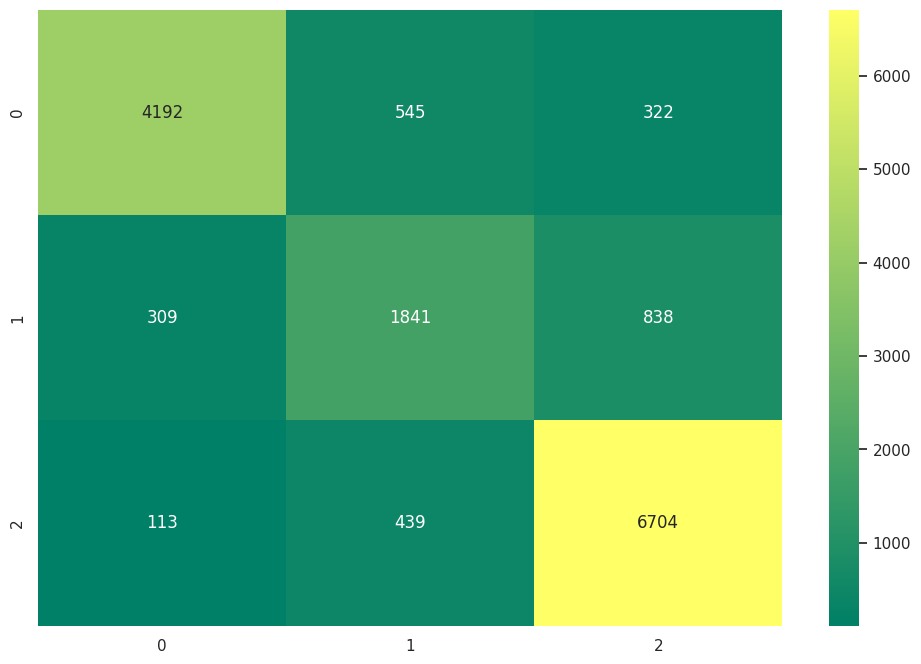

In [98]:
model_prediction(hypertuned_LGBM_model,x,y,n_splits=5,random_state=42)

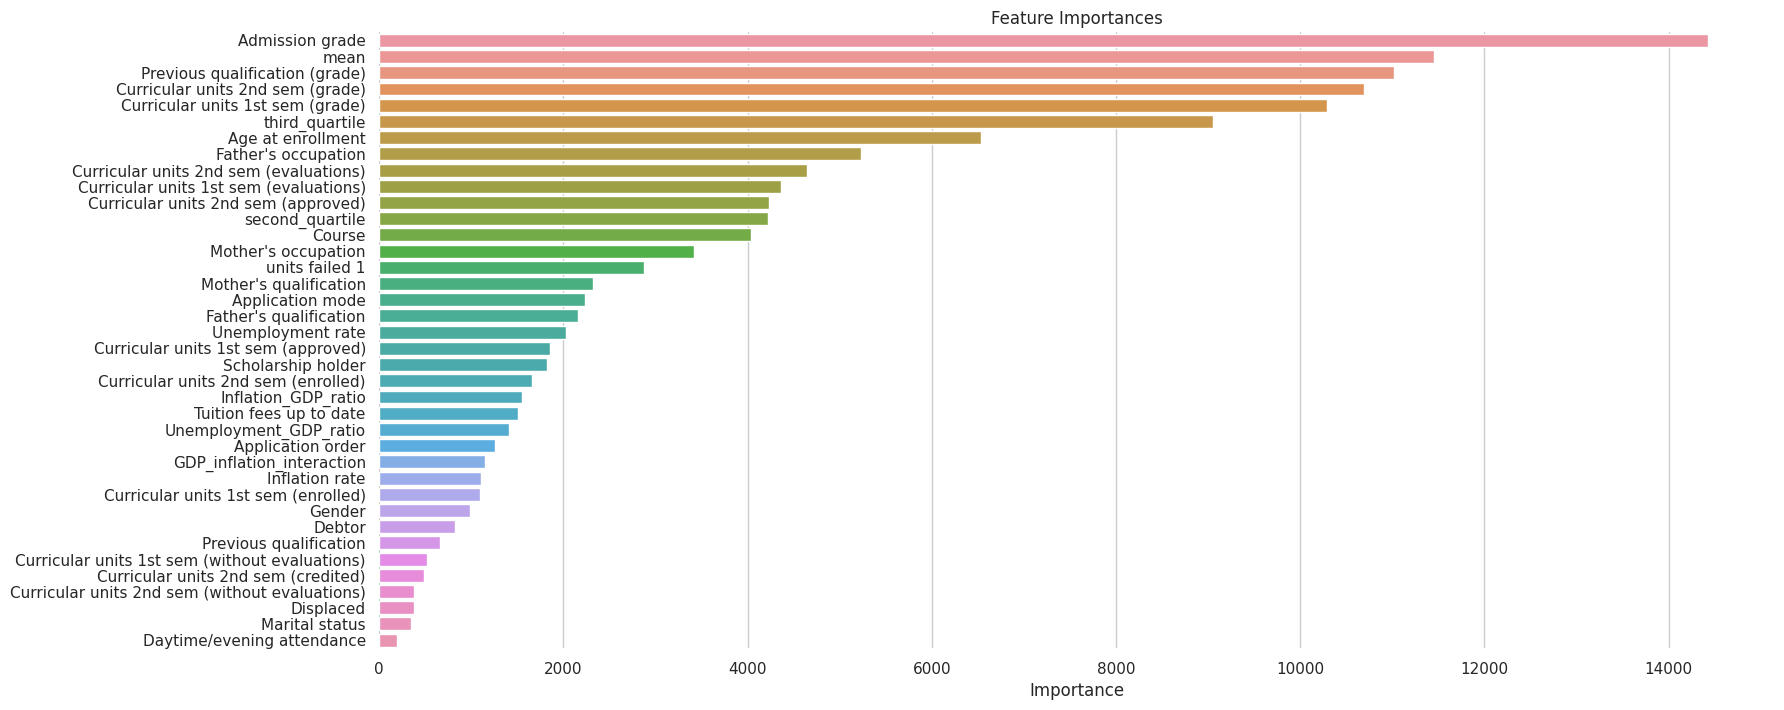

In [99]:
important_features(hypertuned_LGBM_model,x)

# Comparing Performance

In [100]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM','hypertuned_XGB_Model','hypertuned_cb_model','hypertuned_LGBM_model'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [101]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0    hypertuned_XGB_Model          88.080256         83.342480
1   hypertuned_LGBM_model          88.759507         83.198723
2     hypertuned_cb_model          87.509802         83.183041
3                 catbost          86.458742         83.113775
4                    LGBM          85.177670         83.111161
5                 XGBoost          88.575237         83.100705
6                  GBoost          83.081105         82.712563
7            RandomForest          99.999020         82.444647
8    ExtraTree_Classifier         100.000000         82.098328
9                Adaboost          82.088854         81.984630
10    Logistic_Regression          81.661504         81.622623
11          SGD_classifer          80.220013         80.033456
12                    KNN          84.021407         77.992110
13           DecisionTree         100.000000         74.236127
14            Naive_Bayes          73.951880         73.919869

# 7.Model Blending

# 1.Stacking Classifier(XGB + LGBM)

In [102]:
# Define the list of estimators
estimators = [('xgb', hypertuned_XGB_model),('lgbm', hypertuned_LGBM_model)]

# Initialize the StackingClassifier with Random Forest as final estimator
stacking_xgb_lgbm = StackingClassifier(estimators=estimators,final_estimator=LGBMClassifier(), passthrough=True)

In [103]:
stacking_xgb_lgbm

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5841425315961482,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None,
                                              gamma=0.8644097106882519,
                                              grow_policy=None,
                                              importance_type=None,
                                              inte...
                                               colsample_bytree=0.7975468653525116,
                                               learning_rate=0.02636616162598401,
                                               max_bin=156, max_depth=8,
                                               min_child_samples=102,
                                               min_data_in_leaf=5,
                                               min_split_gain=0.7247318987185962,
                                               n_estimators=743, num_leaves=699,
                                               objective='multiclass',
                                               random_state=42,
                                               top_rate=0.6132659772851583,
                                               tree_learner='feature',
                                               verbose=-1))],
                   final_estimator=LGBMClassifier(), passthrough=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3508
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 44
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3517
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 44
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start 

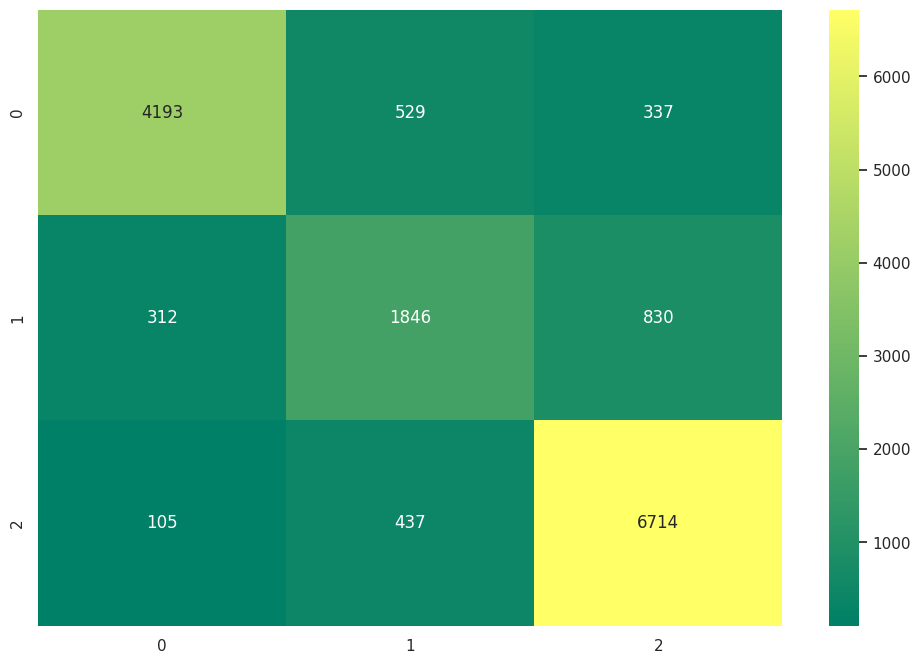

CPU times: user 2h 14min 28s, sys: 35.9 s, total: 2h 15min 4s
Wall time: 39min 1s


In [104]:
%%time
model_prediction(stacking_xgb_lgbm,x,y,n_splits=5,random_state=42)

# 2.Stacking Classifier(Catboost+XGB)

In [105]:
# Define the list of estimators
estimators = [('catboost', hypertuned_cb_model),('xgb', hypertuned_XGB_model)]

# Initialize the StackingClassifier with Random Forest as final estimator
stacking_cat_xgb = StackingClassifier(estimators=estimators,final_estimator=LGBMClassifier(),passthrough=True)

In [106]:
stacking_cat_xgb

StackingClassifier(estimators=[('catboost',
                                <catboost.core.CatBoostClassifier object at 0x7d5d509c59c0>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.5841425315961482,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=No...
                                              interaction_constraints=None,
                                              learning_rate=0.02302515234749565,
                                              max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=9, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=4937, n_jobs=None,
                                              num_class=3,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LGBMClassifier(), passthrough=True)

0:	learn: 0.9929894	total: 34.7ms	remaining: 24.7s
1:	learn: 0.9122820	total: 65.7ms	remaining: 23.4s
2:	learn: 0.8475467	total: 97.3ms	remaining: 23s
3:	learn: 0.7949287	total: 128ms	remaining: 22.7s
4:	learn: 0.7511397	total: 159ms	remaining: 22.5s
5:	learn: 0.7148436	total: 188ms	remaining: 22.1s
6:	learn: 0.6837798	total: 218ms	remaining: 22s
7:	learn: 0.6572162	total: 251ms	remaining: 22.1s
8:	learn: 0.6345630	total: 281ms	remaining: 22s
9:	learn: 0.6147315	total: 312ms	remaining: 21.9s
10:	learn: 0.5974280	total: 342ms	remaining: 21.9s
11:	learn: 0.5821618	total: 378ms	remaining: 22.1s
12:	learn: 0.5688829	total: 408ms	remaining: 22s
13:	learn: 0.5570370	total: 442ms	remaining: 22.1s
14:	learn: 0.5466366	total: 475ms	remaining: 22.1s
15:	learn: 0.5376551	total: 508ms	remaining: 22.1s
16:	learn: 0.5297049	total: 541ms	remaining: 22.2s
17:	learn: 0.5224623	total: 574ms	remaining: 22.1s
18:	learn: 0.5160230	total: 606ms	remaining: 22.1s
19:	learn: 0.5102683	total: 636ms	remaining: 2

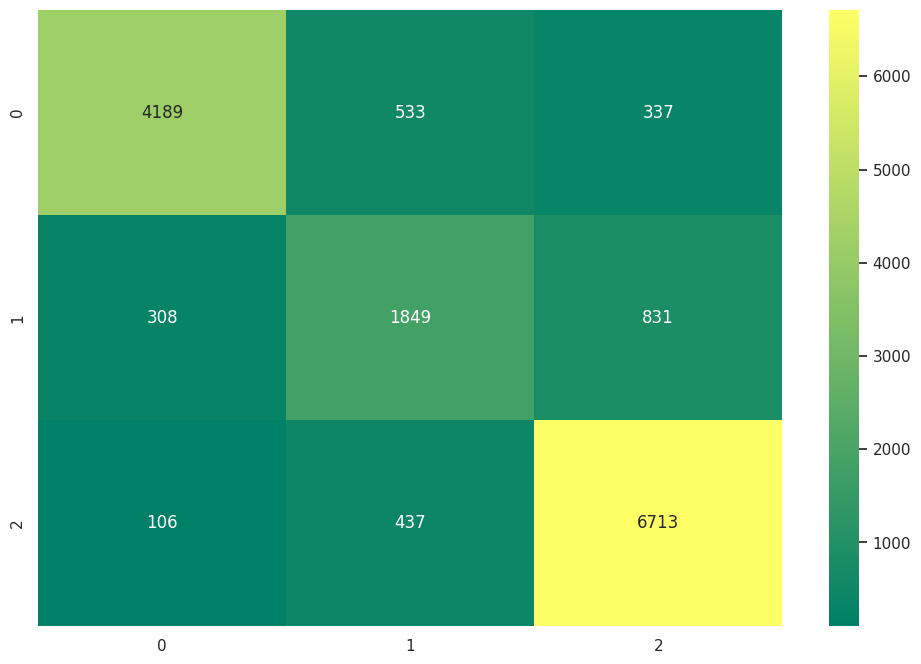

In [107]:
# Fit the stacking classifier on the training data
model_prediction(stacking_cat_xgb, x, y, n_splits=5, random_state=42)

# 3.Voting Ensemble

In [112]:
# Train an Ensemble model using a combination of the GBoost and adaboost Classifiers
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', hypertuned_XGB_model),
        ('stacking1', stacking_xgb_lgbm),
        ('stacking2',stacking_cat_xgb)
    ],
    voting='soft',
    flatten_transform=True
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3508
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 44
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
0:	learn: 0.9929894	total: 31.9ms	remaining: 22.7s
1:	learn: 0.9122820	total: 64.6ms	remaining: 23s
2:	learn: 0.8475467	total: 95.3ms	remaining: 22.6s
3:	learn: 0.7949287	total: 126ms	remaining: 22.4s
4:	learn: 0.7511397	total: 157ms	remaining: 22.2s
5:	learn: 0.7148436	total: 187ms	remaining: 22s
6:	learn: 0.6837798	total: 216ms	remaining: 21.8s
7:	learn: 0.6572162	total: 250ms	remaining: 22s
8:	learn: 0.6345630	total: 281ms	remaining: 22s
9:	learn: 0.6147315	total: 310ms	remaini

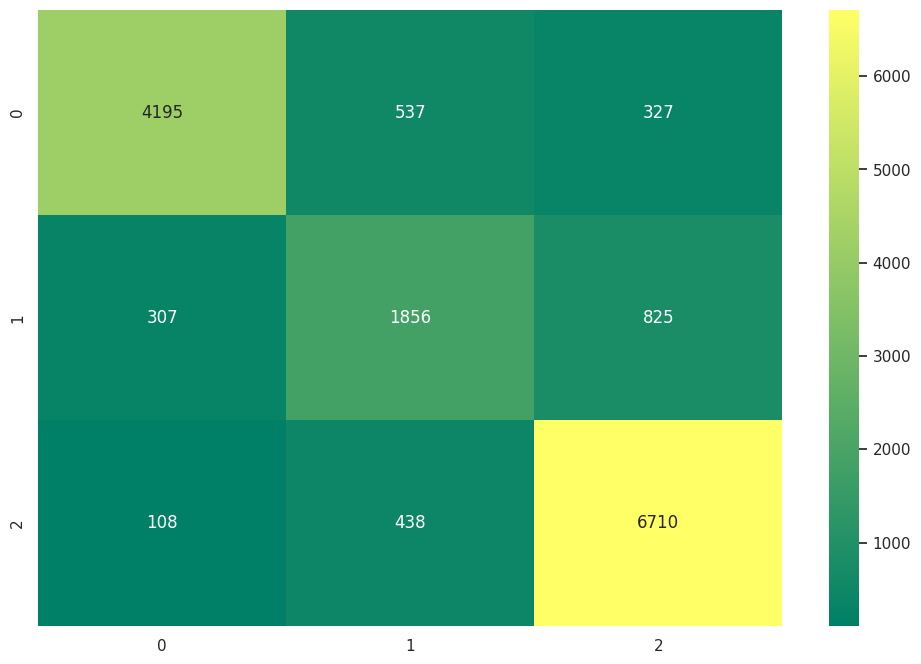

In [113]:
# Fit the stacking classifier on the training data

model_prediction(ensemble_model, x, y, n_splits=5, random_state=42)

# Comparing Performance

In [114]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['SGD_classifer','Logistic_Regression', 'KNN','Naive_Bayes','DecisionTree','ExtraTree_Classifier','RandomForest','Adaboost','GBoost','XGBoost','catbost','LGBM','hypertuned_XGB_Model','hypertuned_cb_model','hypertuned_LGBM_model','stacking_xgb_lgbm','stacking_cat_xgb','ensemble_model'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy
}
Acc_df = pd.DataFrame(data)

In [115]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

Model  Training_Accuracy  Testing_Accuracy
0    hypertuned_XGB_Model          88.080256         83.342480
1          ensemble_model          88.164223         83.326796
2        stacking_cat_xgb          87.959695         83.282361
3       stacking_xgb_lgbm          88.298831         83.222247
4   hypertuned_LGBM_model          88.759507         83.198723
5     hypertuned_cb_model          87.509802         83.183041
6                 catbost          86.458742         83.113775
7                    LGBM          85.177670         83.111161
8                 XGBoost          88.575237         83.100705
9                  GBoost          83.081105         82.712563
10           RandomForest          99.999020         82.444647
11   ExtraTree_Classifier         100.000000         82.098328
12               Adaboost          82.088854         81.984630
13    Logistic_Regression          81.661504         81.622623
14          SGD_classifer          80.220013         80.033456
15                    KNN          84.021407         77.992110
16           DecisionTree         100.000000         74.236127
17            Naive_Bayes          73.951880         73.919869

# 8|Preparing Submission

In [141]:
id=submission_df["id"]
models_to_evaluate = [
    ("hypertuned_cb_model", hypertuned_cb_model),
    ("hypertuned_XGB_Model", hypertuned_XGB_model),
    ("hypertuned_LGBM_model", hypertuned_LGBM_model),
    ("LGBM_model", LGBM_model),
    ("CatBoost_model", CatBoost_model),
    ("XGBClassifier_model", XGBClassifier_model),
    ("stacking_xgb_lgbm",stacking_xgb_lgbm),
    ("stacking_cat_xgb",stacking_cat_xgb),
    ("ensemble_model",ensemble_model)
]
for model_name, model in models_to_evaluate:
    y_pred = model.predict(test_df).ravel()
    y_pred = label_encoder.inverse_transform(y_pred)
    submission = pd.DataFrame({"id": id, "Target": y_pred})
    submission.to_csv(f"{model_name}.csv", index=False)